<a href="https://colab.research.google.com/github/baktiar-sianipar/Prediction-of-Water-Availability-in-Indonesia/blob/main/Kelompok_41_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Background

Dalam World Water Development Report (WWDR) tahun 2020 yang berjudul tentang air dan perubahan iklim mengatakan, perubahan iklim akan terus berubah dan mempengaruhi kehidupan manusia terutama melalui air. Perubahan iklim akan mempengaruhi ketersediaan, kualitas dan kuantitas air untuk kebutuhan dasar manusia, mengancam penikmatan efektif hak asasi manusia atas air dan sanitasi bagi miliaran orang yang berpotensi. Perubahan siklus air juga akan menimbulkan risiko bagi produksi energi, ketahanan pangan, kesehatan manusia, pembangunan ekonomi, dan pengurangan kemiskinan, sehingga sangat membahayakan pembangunan berkelanjutan.

Hutan memiliki peran yang sangat penting dalam menjaga keseimbangan iklim global. Hutan berkontribusi dalam menyerap karbon dioksida dan memainkan peran penting dalam menjaga kestabilan tanah. Selain itu, hutan juga berperan dalam menjaga keseimbangan siklus air. Melalui proses evapotranspirasi, hutan menyimpan dan melepaskan air ke atmosfer, membantu menjaga keberlanjutan siklus air di berbagai ekosistem.

Hutan berfungsi sebagai penyerap air yang penting, dengan kemampuan untuk menyimpan air dalam tanah dan mengeluarkannya melalui transpirasi tanaman. Proses ini membantu menjaga aliran air yang stabil dalam sungai dan sumber air bawah tanah. Selain itu, hutan juga mempengaruhi pola hujan melalui penguapan air dari permukaan daun, yang dapat mempengaruhi pola curah hujan di wilayah sekitarnya.

Dalam menghadapi perubahan iklim yang terus berlangsung, penting bagi kita untuk memiliki pemahaman yang mendalam tentang ketersediaan air. Dengan memahami dan memprediksi tingkat ketersediaan air di suatu wilayah, kita dapat merencanakan pengelolaan sumber daya air secara efektif dan responsif terhadap perubahan iklim. Prediksi ketersediaan air dapat membantu dalam perencanaan penggunaan air yang berkelanjutan, mengurangi risiko kekeringan atau banjir, dan menjaga keberlanjutan ekosistem air.

Dengan memadukan informasi tentang perubahan iklim, peran hutan dalam menjaga keseimbangan siklus air, dan pentingnya prediksi ketersediaan air, kita dapat membangun model prediksi yang berpotensi membantu dalam pengelolaan sumber daya air yang lebih efektif dan berkelanjutan.


## Problem Statement

Perubahan pola curah hujan yang tidak diprediksi dengan akurat dapat mengakibatkan ketidakpastian dalam ketersediaan sumber daya air sehingga menyebabkan risiko kekeringan atau banjir yang ekstrem yang selanjutnya dapat membatasi pasokan air bersih dan keseimbangan lingkungan. Sehingga, diperlukan solusi yang memungkinkan prediksi ketersediaan air lebih akurat yang pada akhirnya pihak-pihak yang terkait dapat mengambil tindakan pencegahan (langkah preventif) dan memberi respon yang lebih positif

Selain itu, masalah utama muncul akibat perilaku manusia yang tidak bertanggung jawab, terutama dalam pembuangan sampah sembarangan ke dalam sungai. Sampah tersebut dapat mengakibatkan pencemaran air, mempengaruhi kesehatan manusia, dan merusak ekosistem sungai. Sehingga perlu untuk menganalisis dampak pembuangan sampah sembarangan terhadap kualitas air sungai dan merancang strategi berkelanjutan untuk mengatasi permasalahan ini, dengan fokus pada edukasi masyarakat, implementasi kebijakan, dan menyediakan wadah untuk bersama bisa ikut berkontribusi dalam melakukan pembersihan pada sungai dan pesisir pantai.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Import Datasets

In [ ]:
url = ('https://raw.githubusercontent.com/baktiar-sianipar/Prediction-of-Water-Availability-in-Indonesia/main/Final%20Project/final_project.csv')
url2 = ('https://raw.githubusercontent.com/baktiar-sianipar/Prediction-of-Water-Availability-in-Indonesia/main/Final%20Project/Hutan%20Per%20Provinsi%20Tahun%202021.csv')
url3 = ('https://raw.githubusercontent.com/baktiar-sianipar/Prediction-of-Water-Availability-in-Indonesia/main/Final%20Project/Sumber%20Air%20Bersih%20Rumah%20Tangga.csv')
url4 = ('https://raw.githubusercontent.com/baktiar-sianipar/Prediction-of-Water-Availability-in-Indonesia/main/Final%20Project/Ketersediaan%20Air%20per%20kapita%20(Cubic).csv')

## Data Air dan Hutan tahun 1990 - 2020

In [ ]:
df = pd.read_csv (url)
df.head(5)

,year,"annual_freshwater_withdrawals,_total_(%_of_internal_resources)",forest_area_(sq._km),forest_area_(%_of_land_area),level_of_water_stress:_freshwater_withdrawal_as_a_proportion_of_available_freshwater_resources
0,1990,3.681889,1185450.0,65.437714,9.914139
1,1991,3.874804,1168185.0,64.484674,10.433596
2,1992,4.067719,1150920.0,63.531633,10.953053
3,1993,4.260634,1133655.0,62.578592,11.472510
4,1994,4.453529,1116390.0,61.625551,11.991967


In [ ]:
df.columns = ['year', 'freshwater_withdrawals', 'forest_area_sq_km', 'forest_area_percent', 'water_stress']
df.head(5)

,year,freshwater_withdrawals,forest_area_sq_km,forest_area_percent,water_stress
0,1990,3.681889,1185450.0,65.437714,9.914139
1,1991,3.874804,1168185.0,64.484674,10.433596
2,1992,4.067719,1150920.0,63.531633,10.953053
3,1993,4.260634,1133655.0,62.578592,11.472510
4,1994,4.453529,1116390.0,61.625551,11.991967


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    32 non-null     int64  
 1   freshwater_withdrawals  31 non-null     float64
 2   forest_area_sq_km       32 non-null     float64
 3   forest_area_percent     32 non-null     float64
 4   water_stress            31 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.4 KB


## Data Hutan Per Provinsi Tahun 2021

In [ ]:
df2 = pd.read_csv (url2)
df2.head(5)

,Provinsi,Jumlah Luas Daratan Kawasan Hutan (Ha),Jumlah Luas Daratan dan Perairan Kawasan Hutan (Ha)
0,Aceh,3550390.23,3550390.23
1,Sumatera Utara,3055795.00,3055795.00
2,Sumatera Barat,2342894.00,2380057.00
3,Riau,5406992.00,5406992.00
4,Jambi,2098535.00,2098535.00


## Data Additional

In [ ]:
df3 = pd.read_csv (url3)
df3.head(5)

,Tahun,Leding,Pompa,Air Dalam Kemasan,Sumur Terlindung,Sumur Tak Terlindung,Mata Air Terlindung,Mata Air Tak Terlindung,Lainnya
0,2021,9.39441,12.38500,40.34824,14.71324,4.01206,9.32882,2.85235,6.96412
1,2020,10.07412,12.75853,40.76029,13.66794,5.14294,8.08765,2.81235,6.69471
2,2019,10.41647,10.64353,39.46294,15.45882,5.56941,8.27382,3.26706,6.90647
3,2018,10.94147,10.62882,37.22412,15.82471,6.12206,8.42735,3.51765,7.60706
4,2017,10.89206,9.95353,35.69912,17.31765,6.50853,8.44824,3.41471,7.76500


# Descriptive Statistics - Basic Measures

In [ ]:
summary_stats = df.describe()
print(summary_stats)

              year  freshwater_withdrawals  forest_area_sq_km  \
count    32.000000               31.000000       3.200000e+01   
mean   2005.500000                7.453278       1.017591e+06   
std       9.380832                2.569283       7.318273e+04   
min    1990.000000                3.681889       9.152766e+05   
25%    1997.750000                5.128713       9.664885e+05   
50%    2005.500000                7.304035       1.003886e+06   
75%    2013.250000                9.843533       1.051646e+06   
max    2021.000000               11.028632       1.185450e+06   

       forest_area_percent  water_stress  
count            32.000000     31.000000  
mean             54.857811     20.069284  
std               4.816193      6.918235  
min              48.361945      9.914139  
25%              51.476899     13.810067  
50%              53.468732     19.667409  
75%              58.051649     26.505456  
max              65.437714     29.696545  


In [ ]:
summary_stats = df3.describe()
print(summary_stats)

           Tahun     Leding      Pompa  Air Dalam Kemasan  Sumur Terlindung  \
count    14.0000  14.000000  14.000000          14.000000         14.000000   
mean   2014.5000  11.792056  10.120784          28.821739         20.280491   
std       4.1833   2.140168   1.199738           9.886287          4.592692   
min    2008.0000   9.394410   8.859090          10.672120         13.667940   
25%    2011.2500  10.510148   9.274385          23.247800         16.197945   
50%    2014.5000  11.045130   9.748530          29.710445         19.885145   
75%    2017.7500  11.924697  10.618358          36.842870         23.567725   
max    2021.0000  16.335450  12.758530          40.760290         27.413330   

       Sumur Tak Terlindung  Mata Air Terlindung  Mata Air Tak Terlindung  \
count             14.000000            14.000000                14.000000   
mean               7.737089             8.734309                 3.858286   
std                2.256399             0.528965         

# Exploratory Data Analysis - Univariate Analysis

## Histogram

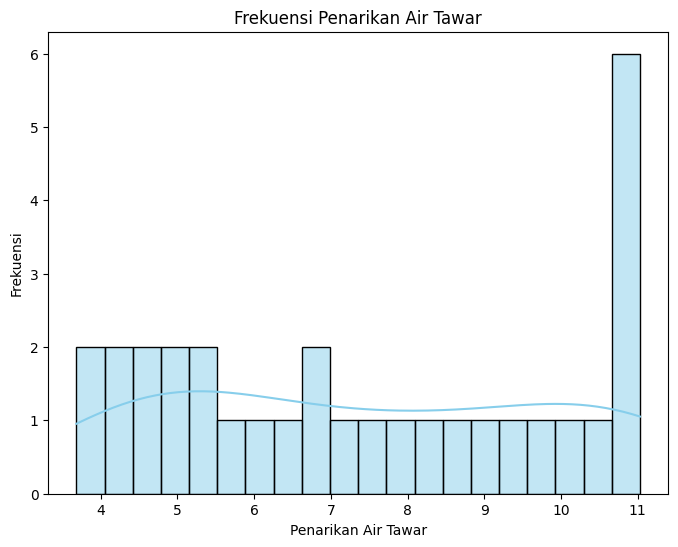

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['freshwater_withdrawals'], bins=20, kde=True, color='skyblue')
plt.title('Frekuensi Penarikan Air Tawar')
plt.xlabel('Penarikan Air Tawar')
plt.ylabel('Frekuensi')
plt.show()

Sumbu x pada histogram tersebut mewakili “Penarikan Air Tawar Tahunan, Total (% dari Sumber Daya Internal)”. Dari histogram tersebut, tampak bahwa frekuensi tertinggi penarikan air tawar terjadi pada nilai 11%, sementara frekuensi terendah terjadi pada nilai 4%. Ini menunjukkan bahwa sebagian besar penarikan air tawar berada di sekitar nilai 11% dari sumber daya air internal. Jika penarikan air tawar tinggi (mendekati 11%), ini mungkin menunjukkan bahwa ketersediaan air mungkin rendah karena sebagian besar air digunakan.

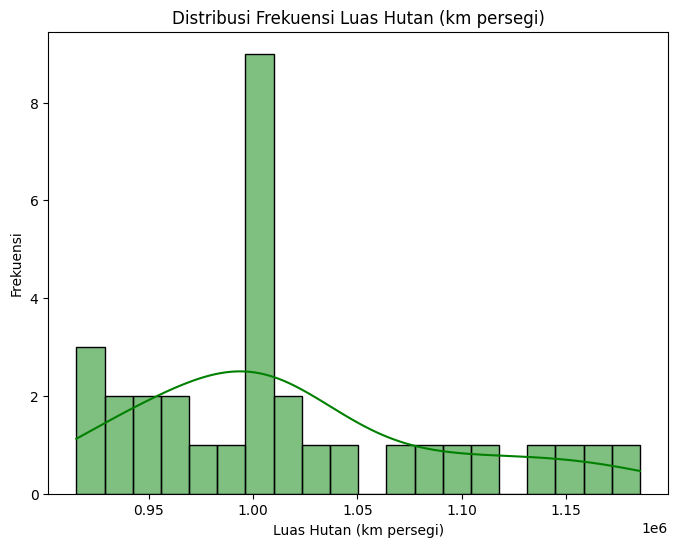

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['forest_area_sq_km'], bins=20, kde=True, color='green')
plt.title('Distribusi Frekuensi Luas Hutan (km persegi)')
plt.xlabel('Luas Hutan (km persegi)')
plt.ylabel('Frekuensi')
plt.show()

Sumbu x pada histogram tersebut mewakili “Lahan hutan (Km persegi)”. Dari histogram tersebut, tampak bahwa frekuensi tertinggi terjadi pada sekitar nilai 1,00 kilometer persegi dengan frekuensi lebih dari 8.

Histogram ini menunjukkan distribusi frekuensi luas hutan dalam satuan kilometer persegi (km persegi). Pada sumbu horizontal X, terdapat nilai luas hutan yang berkisar dari sekitar 0.95 juta km persegi hingga 1.15 juta km persegi. Sumbu vertikal Y menunjukkan frekuensi atau jumlah kejadian untuk setiap kisaran luas hutan tersebut.

Berdasarkan histogram, kita bisa melihat bahwa:

1. Ada satu batang yang menonjol dengan frekuensi tertinggi, lebih dari 8 kali kejadian, untuk luas hutan sekitar 1 juta km persegi.
2. Frekuensi menurun di kedua sisi batang tersebut, dengan frekuensi terendah terlihat pada kelompok yang memiliki luas hutan lebih besar dari 1.1 juta km persegi.
3. Garis menunjukkan bahwa distribusi frekuensi luas hutan tidak sempurna simetris dan memiliki puncak yang lebih tinggi daripada distribusi normal, yang menandakan adanya skewness atau kemiringan dalam data tersebut.

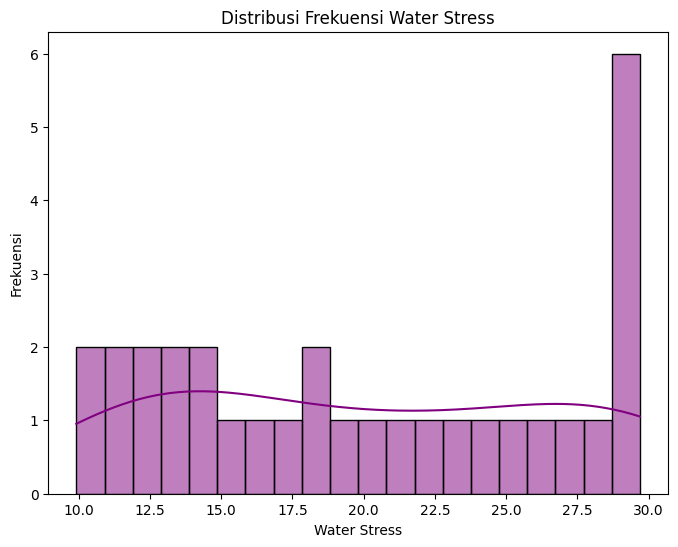

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['water_stress'], bins=20, kde=True, color='purple')
plt.title('Distribusi Frekuensi Water Stress')
plt.xlabel('Water Stress')
plt.ylabel('Frekuensi')
plt.show()

1. Batang histogram dengan water stress 30.0 memiliki frekuensi tertinggi, sekitar 6 kejadian.
2. Terdapat beberapa batang histogram dengan frekuensi rendah yang tersebar di seluruh rentang, menunjukkan bahwa terdapat variasi dalam kejadian water stress.
3. Garis kurva yang melewati histogram menunjukkan rata-rata dari distribusi, yang menunjukkan bahwa kebanyakan data berkumpul pada ujung yang lebih rendah dari skala water stress, dengan peningkatan tajam pada ujung yang lebih tinggi.

## Line Plot

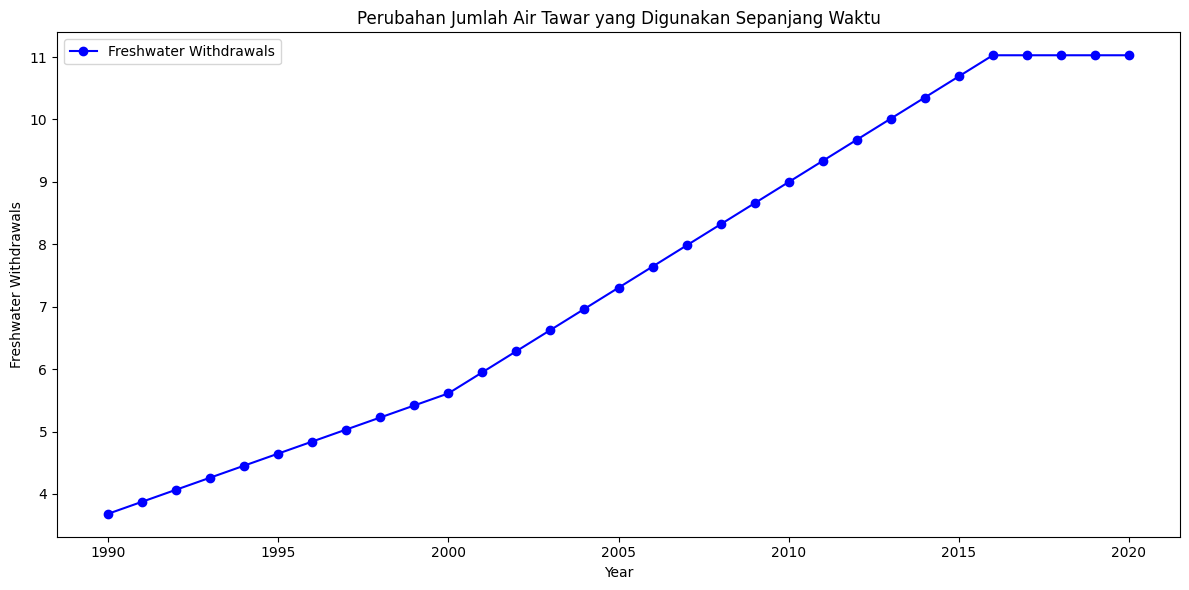

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['freshwater_withdrawals'], label='Freshwater Withdrawals', marker='o', color='blue')
plt.title('Perubahan Jumlah Air Tawar yang Digunakan Sepanjang Waktu')
plt.xlabel('Year')
plt.ylabel('Freshwater Withdrawals')
plt.legend()
plt.tight_layout()
plt.show()

Grafik ini menunjukkan penarikan air tawar selama beberapa tahun, mulai dari tahun 1990 hingga mendekati tahun 2020.

Titik-titik biru merepresentasikan nilai penarikan air tawar setiap tahunnya, dan garis yang menghubungkan titik-titik tersebut menunjukkan tren keseluruhan. Tidak ada fluktuasi besar atau penurunan tajam yang terlihat; sebaliknya, grafik menunjukkan tren peningkatan yang konsisten dalam penarikan air tawar selama periode waktu tersebut. Berikut adalah interpretasi data berdasarkan grafik:

1. Mulai tahun 1990 hingga tahun 2020, penarikan air tawar meningkat secara konsisten.Hal ini menunjukkan bahwa jumlah air tawar yang diekstraksi dari sumber alam selalu meningkat.

2.  Laju peningkatan tampaknya relatif konstan. Ada banyak hal yang bisa mempengaruhinya, seperti pertumbuhan populasi, pertumbuhan ekonomi dan industri, perubahan iklim, dan kebutuhan pertanian.

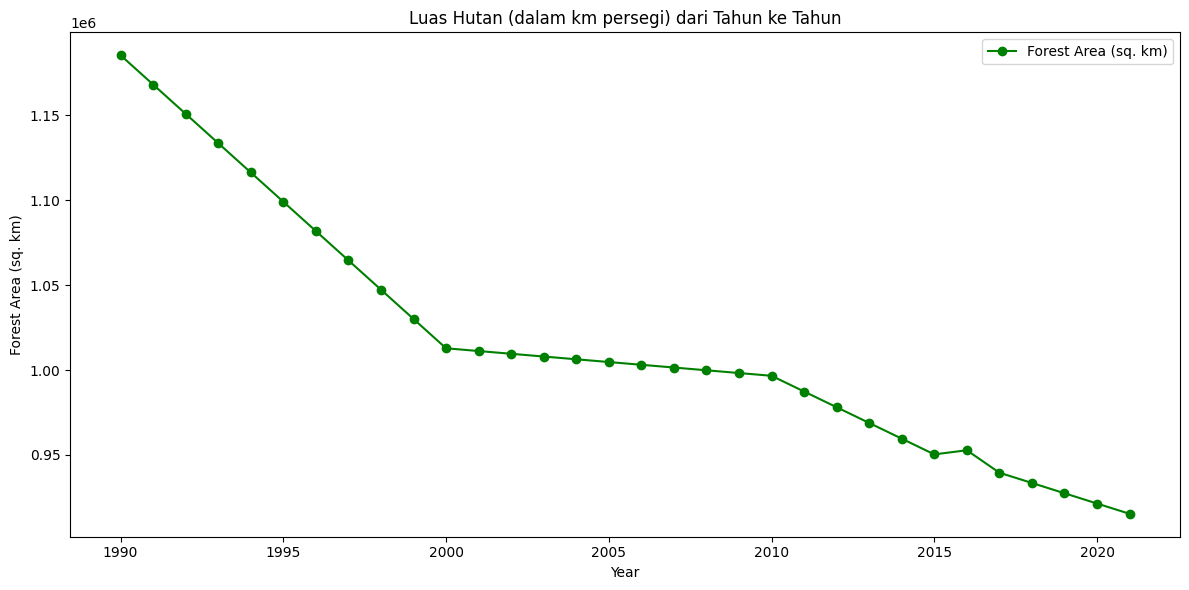

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['forest_area_sq_km'], label='Forest Area (sq. km)', marker='o', color='green')
plt.title('Luas Hutan (dalam km persegi) dari Tahun ke Tahun')
plt.xlabel('Year')
plt.ylabel('Forest Area (sq. km)')
plt.legend()
plt.tight_layout()
plt.show()

Gambar ini menunjukkan tren penurunan luas hutan yang diukur dalam kilometer persegi. Ini menunjukkan deforestasi atau kehilangan area hutan seiring waktu.

Berdasarkan gambar tersebut, tampaknya terjadi penurunan yang cukup linier, menunjukkan tingkat kehilangan area hutan yang konsisten setiap tahun. Penyebab Kemungkinan: Ini bisa disebabkan oleh peningkatan penggunaan lahan untuk pertanian, urbanisasi, atau penebangan.

Penurunan konsisten dalam luas hutan bisa menjadi penyebab kekhawatiran karena berdampak pada penyerapan karbon, keseimbangan ekologis, siklus air tawar karena hutan memainkan peran kritis dalam pengisian ulang air tanah.

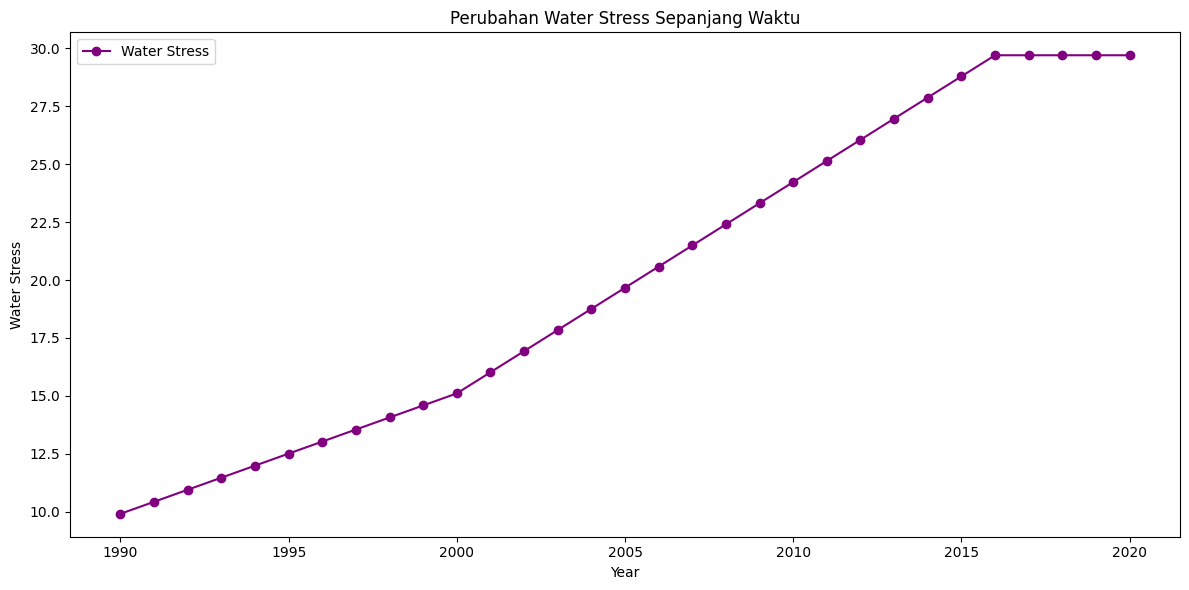

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['water_stress'], label='Water Stress', marker='o', color='purple')
plt.title('Perubahan Water Stress Sepanjang Waktu')
plt.xlabel('Year')
plt.ylabel('Water Stress')
plt.legend()
plt.tight_layout()
plt.show()

Water stress mengukur total air tawar yang diambil dengan total air tawar yang tersedia. Semakin tinggi total air tawar yang diambil maka akan menyebabkan semakin berkurangnya air tawar yang tersedia, sehingga berimplikasi pada terjadinya kekeringan. Ketika suatu wilayah menarik 25 persen atau lebih dari sumber daya air tawar yang dapat diperbarui, dikatakan ‘water stress’.

Berdasarkan grafik di atas, terjadi peningkatan yang relatif mulus dan menjadi sedikit lebih menonjol setelah pertengahan 2000-an. Penyebab Kemungkinan: Stres air yang meningkat bisa disebabkan oleh peningkatan penarikan air tawar, seperti yang terlihat pada plot pertama dan/atau bisa dipengaruhi oleh deforestasi seperti yang terlihat pada plot kedua. Peningkatan water stress adalah indikasi potensi masalah kelangkaan air, yang bisa menyebabkan masalah bagi konsumsi manusia, pertanian, dan ekosistem.

## Bar Chart

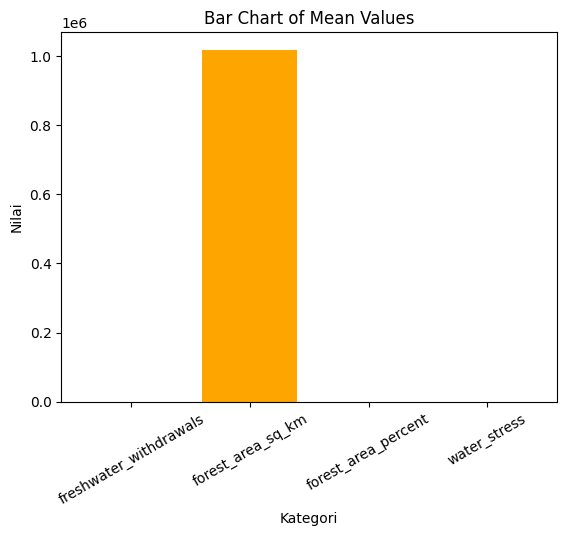

In [ ]:
# Data
categories = ['freshwater_withdrawals', 'forest_area_sq_km', 'forest_area_percent', 'water_stress']
values_mean = [ 7.45, 1017591.0 , 54.86, 20.07 ]

# Membuat bar chart
plt.bar(categories, values_mean, color=['blue', 'orange', 'green', 'red'])
plt.xticks(rotation=30)

# Menambahkan judul umum
plt.title('Bar Chart of Mean Values')

# Menambahkan label sumbu x dan y
plt.xlabel('Kategori')
plt.ylabel('Nilai')

# Menampilkan grafik
plt.show()

karena nilai rata-rata dari forest_area_sq_km terlalu tinggi, jadi membuat nilai rata-rata kategori lainnya tidak terlihat di bar chart. dibawah ini di visualisasikan untuk bar chart selain forest_area_sq_km

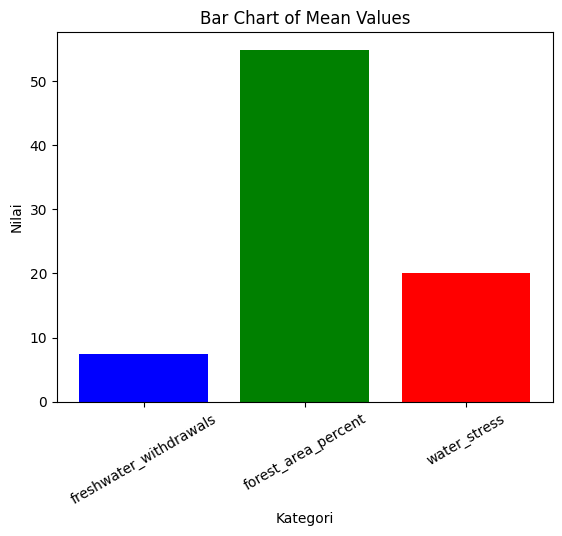

In [ ]:
# Data
categories = ['freshwater_withdrawals', 'forest_area_percent', 'water_stress']
values_mean = [ 7.45, 54.86, 20.07 ]

# Membuat bar chart
plt.bar(categories, values_mean, color=['blue', 'green', 'red'])
plt.xticks(rotation=30)

# Menambahkan judul umum
plt.title('Bar Chart of Mean Values')

# Menambahkan label sumbu x dan y
plt.xlabel('Kategori')
plt.ylabel('Nilai')

# Menampilkan grafik
plt.show()


"Freshwater withdrawals" memiliki nilai yang relatif rendah, diwakili dengan bar biru.

"Forest area percent" memiliki nilai yang sangat tinggi, diwakili dengan bar hijau yang tinggi.

"Water stress" memiliki nilai menengah, diwakili dengan bar merah.

"forest area" ditampilkan dalam skala yang berbeda untuk memberikan visualisasi yang lebih jelas. Bar ini, diwakili dengan warna orange, menunjukkan nilai yang mendekati 1.0, yang memiliki nilai maksimum pada skala ini.


"Freshwater withdrawals" atau penarikan air dengan rata-rata yang rendah dapat mengindikasikan bahwa penggunaan air di suatu wilayah diatur dengan baik bahwa wilayah tersebut memiliki akses yang cukup ke sumber air, sehingga tidak perlu penarikan dalam jumlah besar.

"Forest area percent" yang tinggi menandakan bahwa sebagian besar wilayah tersebut tertutup hutan, yang bisa memberikan manfaat ekologis seperti konservasi air, pengaturan iklim mikro, dan penyediaan habitat bagi keanekaragaman hayati.

"Water stress" menunjukkan seberapa besar tekanan yang diberikan pada sumber daya air. Nilai yang menengah bisa mengindikasikan bahwa meskipun ada beberapa tantangan dalam pengelolaan sumber daya air, situasinya mungkin tidak terlalu kritis.

Hubungan antara "forest area percent" yang tinggi dan "water stress" yang menengah bisa diinterpretasikan sebagai hutan yang memainkan peran dalam mengurangi stres air dengan cara menstabilkan siklus air dan mengurangi erosi tanah.

"freshwater withdrawals" yang rendah mungkin berkontribusi pada tingkat "water stress" yang lebih rendah karena ada lebih sedikit tekanan pada sumber daya air.






## Density Plot

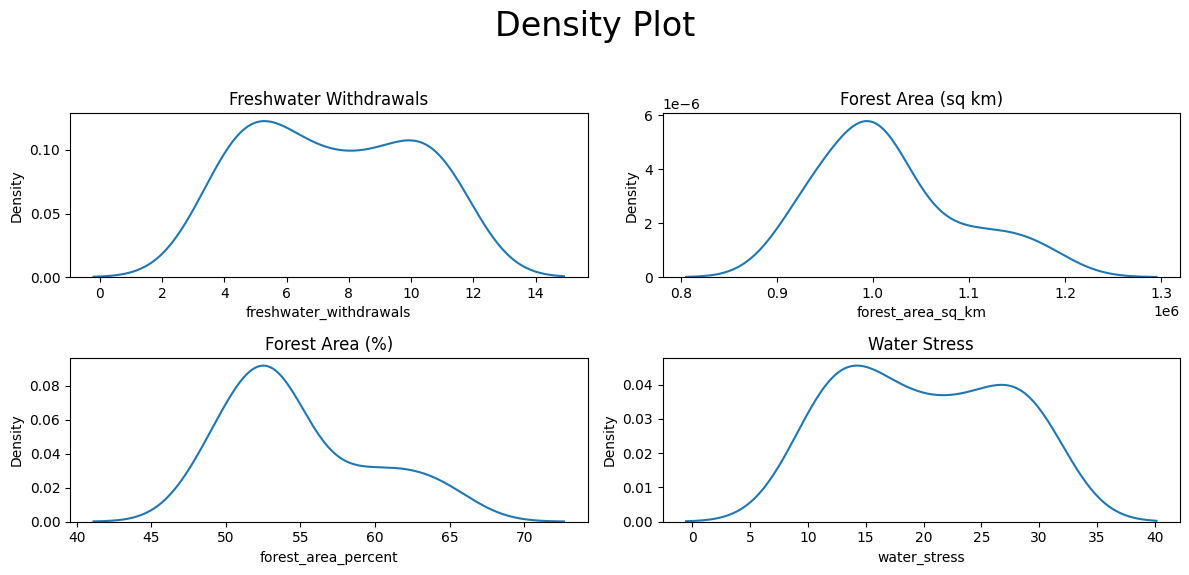

In [ ]:
# Membuat objek figure untuk menyertakan semua subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
fig.suptitle('Density Plot', fontsize=24)

# Membuat Density Plot untuk 'freshwater_withdrawals'
axes[0, 0].set_title('Freshwater Withdrawals')
sns.kdeplot(df['freshwater_withdrawals'], ax=axes[0, 0])

# Membuat Density Plot untuk 'forest_area_sq_km'
axes[0, 1].set_title('Forest Area (sq km)')
sns.kdeplot(df['forest_area_sq_km'], ax=axes[0, 1])

# Membuat Density Plot untuk 'forest_area_percent'
axes[1, 0].set_title('Forest Area (%)')
sns.kdeplot(df['forest_area_percent'], ax=axes[1, 0])

# Membuat Density Plot untuk 'water_stress'
axes[1, 1].set_title('Water Stress')
sns.kdeplot(df['water_stress'], ax=axes[1, 1])

# Menyesuaikan tata letak subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Menampilkan Density Plot
plt.show()

Freshwater Withdrawals: Density plot menunjukkan puncak kepadatan sekitar nilai 3 dan 11. Ini menunjukkan bahwa ada dua kelompok utama atau kondisi penggunaan air tawar yang berbeda.

Forest Area (sq km): Plot ini menunjukkan distribusi yang simetris dengan puncak yang terletak sekitar 1.0e6 (1 juta) kilometer persegi. Distribusi ini menunjukkan bahwa sebagian besar wilayah memiliki luas hutan di sekitar nilai tengah tersebut.

Forest Area (%): Density plot ini menunjukkan puncak kepadatan sekitar 55%, menandakan bahwa ini adalah persentase luas hutan yang paling umum dalam dataset.

Water Stress: Plot ini memiliki distribusi dengan puncak kepadatan sekitar nilai 10 dan 30, menunjukkan dua kondisi stres air yang sering terjadi.

# Exploratory Data Analysis 2 - Bivariate Analysis

## Correlation Matrix

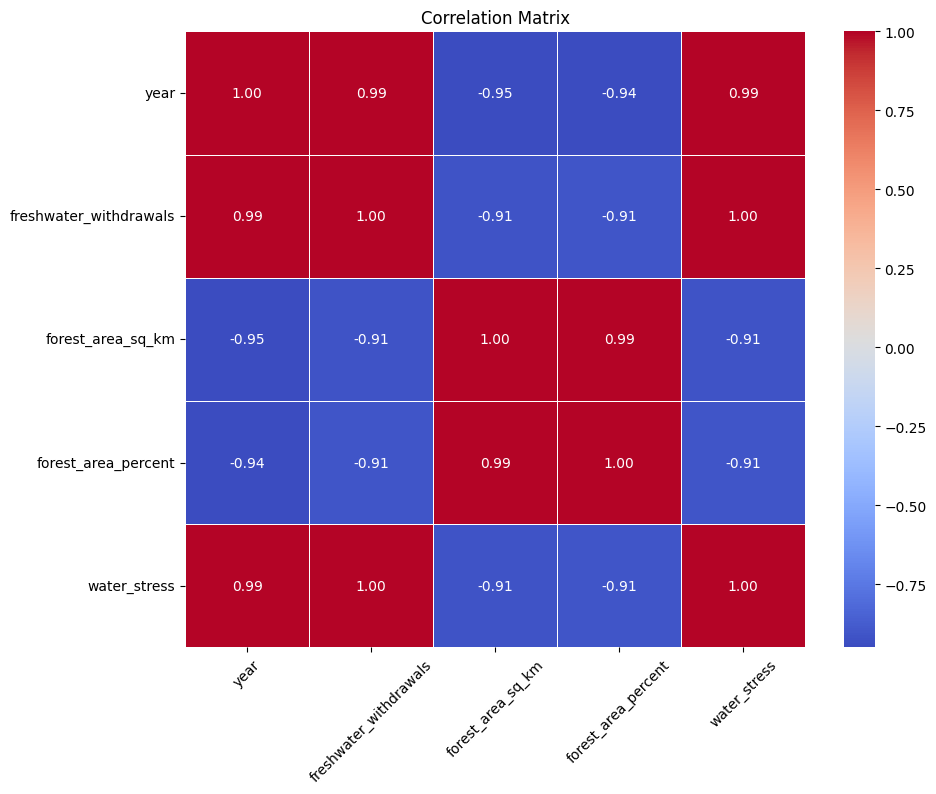

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5)
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()

Berdasarkan hasil analisis ada korelasi positif yang kuat antara tahun dan penarikan air tawar (0,99) dan tingkat stres air (0,99) menunjukkan bahwa seiring berjalannya waktu, baik penarikan air tawar maupun stres sumber daya air telah meningkat secara signifikan. Hal ini menunjukkan ada kemungkinan bahwa selama bertahun-tahun, telah terjadi peningkatan permintaan air atau penurunan ketersediaan air, atau keduanya.

Selanjutnya, penarikan air tawar memiliki korelasi positif yang sangat kuat dengan stres air (1,00), hal itu karena penarikan yang meningkat dapat menyebabkan stres yang lebih besar pada pasokan air. Ada juga korelasi negatif yang sangat kuat antara penarikan air tawar dan kedua ukuran luas hutan (km persegi: -0,91, persen: -0,91), yang menunjukkan bahwa daerah dengan penarikan air tawar yang lebih tinggi cenderung memiliki tutupan hutan yang lebih sedikit.

## Scatter Plot

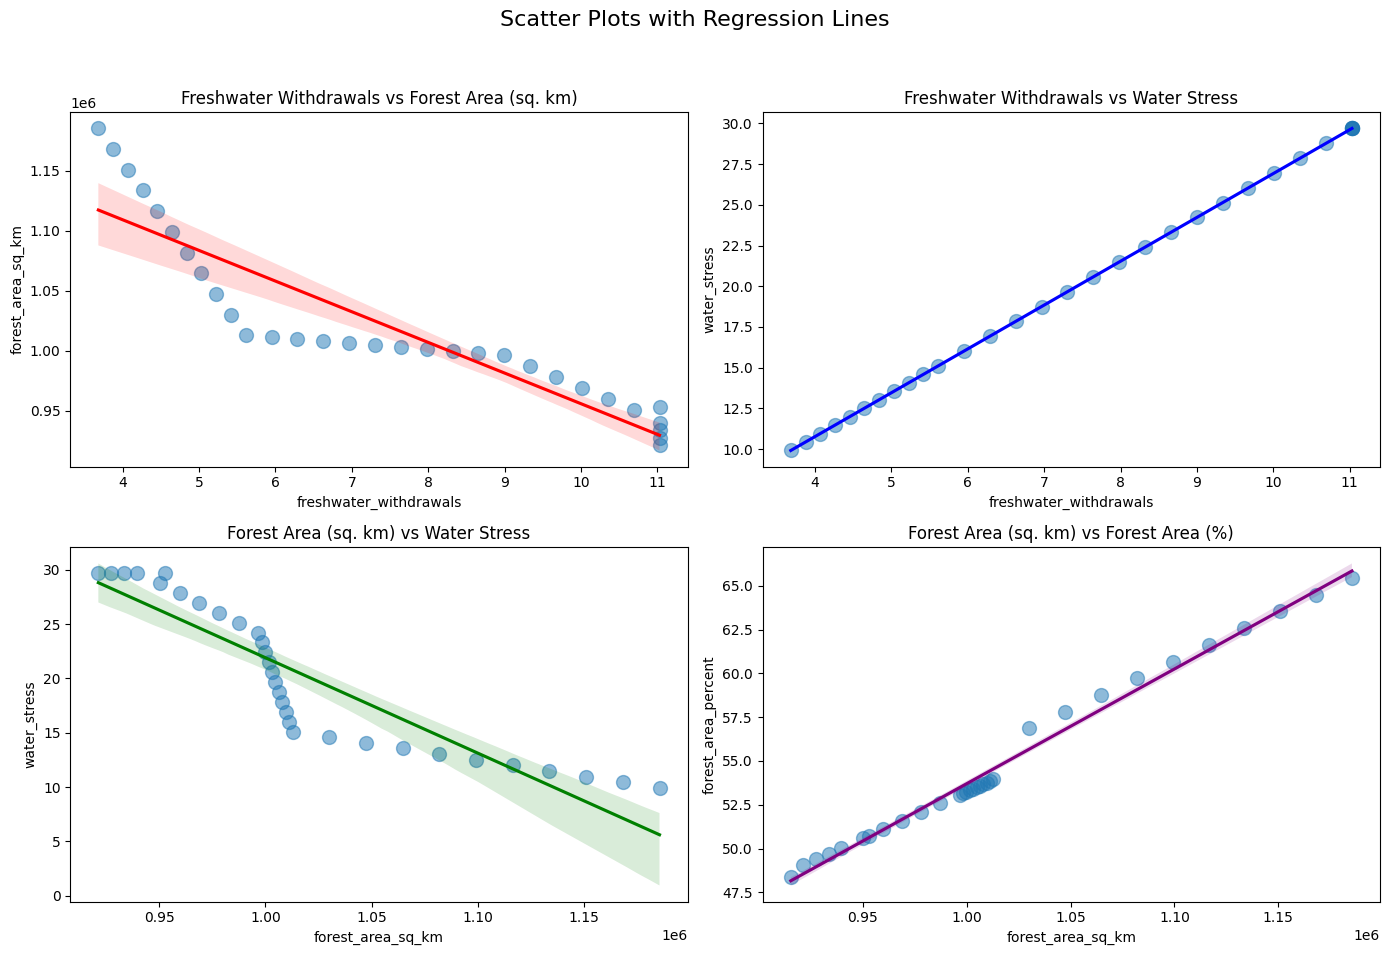

In [ ]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Scatter Plots with Regression Lines', fontsize=16)

# Scatter Plot 1
sns.regplot(ax=axes[0, 0],
            x='freshwater_withdrawals',
            y='forest_area_sq_km',
            data=df,
            scatter_kws={'s': 100, 'alpha': 0.5},
            line_kws={'color': 'red'})
axes[0, 0].set_title('Freshwater Withdrawals vs Forest Area (sq. km)')

# Scatter Plot 2
sns.regplot(ax=axes[0, 1],
            x='freshwater_withdrawals',
            y='water_stress',
            data=df,
            scatter_kws={'s': 100, 'alpha': 0.5},
            line_kws={'color': 'blue'})
axes[0, 1].set_title('Freshwater Withdrawals vs Water Stress')

# Scatter Plot 3
sns.regplot(ax=axes[1, 0],
            x='forest_area_sq_km',
            y='water_stress',
            data=df,
            scatter_kws={'s': 100, 'alpha': 0.5},
            line_kws={'color': 'green'})
axes[1, 0].set_title('Forest Area (sq. km) vs Water Stress')

# Scatter Plot 4
sns.regplot(ax=axes[1, 1],
            x='forest_area_sq_km',
            y='forest_area_percent',
            data=df, scatter_kws={'s': 100, 'alpha': 0.5},
            line_kws={'color': 'purple'})
axes[1, 1].set_title('Forest Area (sq. km) vs Forest Area (%)')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

Scatterplot freshwater withdrawals (penarikan air tawar) vs forest area (km persegi) menunjukkan hubungan negatif, seperti ditunjukkan oleh garis yang menurun. Plot titik menunjukkan hubungan linear negatif yang jelas, yang menunjukkan bahwa seiring peningkatan penarikan air tawar, luas hutan menurun. Kemudian, pengelompokan titik yang cukup rapat di sekitar garis regresi, menunjukkan bahwa penarikan air tawar bisa menjadi prediktor yang baik untuk luas hutan, atau sebaliknya. Untuk pemodelan prediktif, ini menyiratkan bahwa peningkatan konsumsi air berpotensi menunjukkan deforestasi. Hubungan ini harus dikuantifikasi untuk meramalkan luas hutan berdasarkan proyeksi penarikan air.

Scatter Plot untuk “freshwater withdrawals (Penarikan Air Tawar) vs Stres Air” menunjukkan hubungan positif, dengan garis yang naik. Penarikan air tawar yang lebih tinggi sesuai dengan tingkat stres air yang lebih tinggi. Hubungan ini diharapkan karena pengambilan berlebihan sumber daya air akan secara alami menyebabkan stres yang lebih besar pada sistem. Pengelompokan titik yang rapat di sekitar garis regresi dan kemiringan yang curam menunjukkan hubungan prediktif yang kuat yang dapat dimanfaatkan dalam model untuk meramalkan stres air dari data penarikan air.

Scatter Plot Forest Area (sq. km) vs Water Stress menunjukkan hubungan negatif. Ada hubungan linear negatif, yang menunjukkan bahwa luas hutan yang lebih besar berhubungan dengan stres air yang lebih rendah. Ini bisa disebabkan oleh peran hutan dalam mengatur siklus air, mendukung pengisian ulang air tanah, dan mengurangi aliran permukaan. Dalam pemodelan prediktif, model dapat mencakup luas hutan sebagai prediktor negatif untuk stres air. Selain itu, ini menunjukkan bahwa konservasi hutan dan reboisasi bisa efektif dalam mengurangi stres air.


## Box Plot

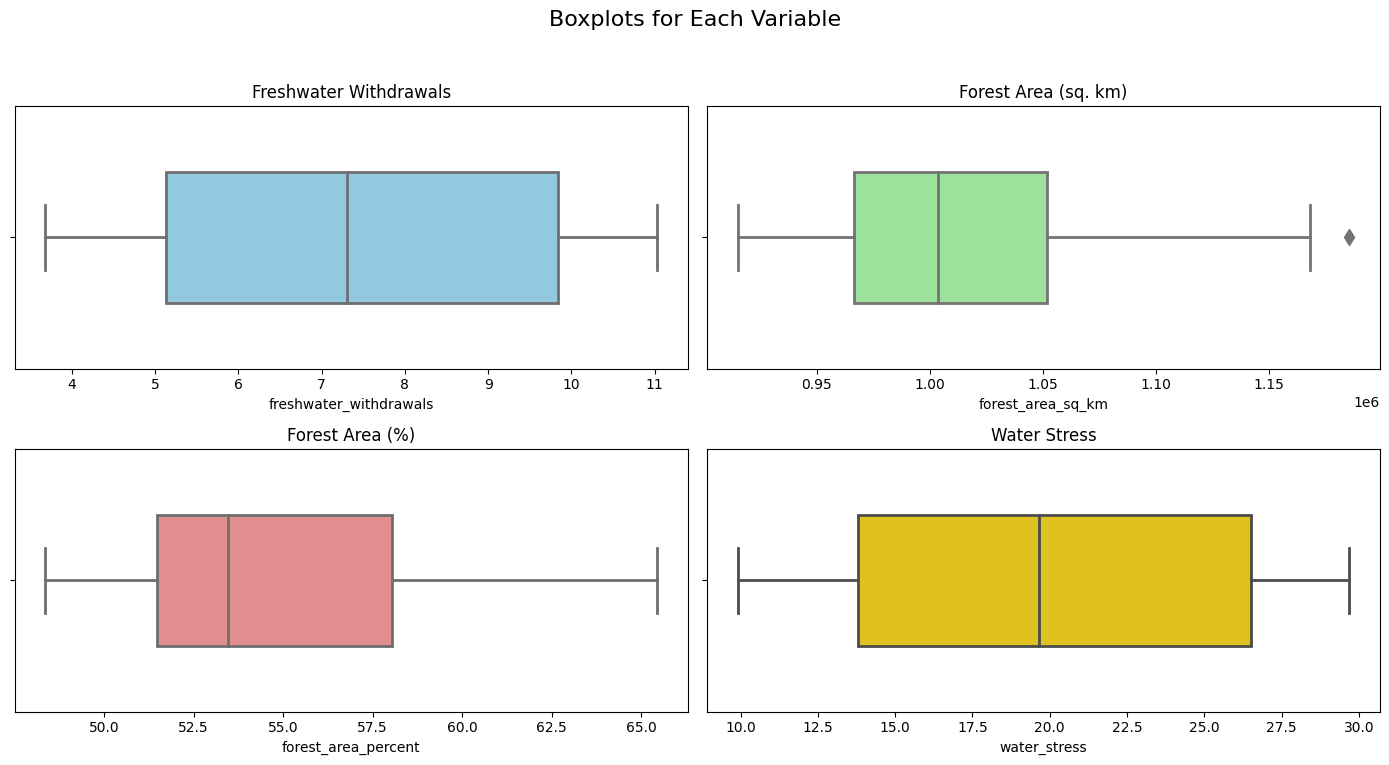

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))
plt.suptitle('Boxplots for Each Variable',
             fontsize=16)

# Boxplot 1
plt.subplot(2, 2, 1)
sns.boxplot(x=df['freshwater_withdrawals'],
            color='skyblue',
            width=0.5,
            linewidth=2,
            fliersize=8)
plt.title('Freshwater Withdrawals')

# Boxplot 2
plt.subplot(2, 2, 2)
sns.boxplot(x=df['forest_area_sq_km'],
            color='lightgreen',
            width=0.5,
            linewidth=2,
            fliersize=8)
plt.title('Forest Area (sq. km)')

# Boxplot 3
plt.subplot(2, 2, 3)
sns.boxplot(x=df['forest_area_percent'],
            color='lightcoral',
            width=0.5,
            linewidth=2,
            fliersize=8)
plt.title('Forest Area (%)')

# Boxplot 4
plt.subplot(2, 2, 4)
sns.boxplot(x=df['water_stress'],
            color='gold',
            width=0.5,
            linewidth=2,
            fliersize=8)
plt.title('Water Stress')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

**Analisis Boxplot Freshwater Withdrawals (Penarikan Air Tawar)**

Median penarikan air tawar berada di sekitar tengah kotak, menunjukkan distribusi yang cukup simetris dari variabel ini Tidak ada outlier, yang berarti tidak ada nilai ekstrem yang dapat mempengaruhi hasil model prediktif. Untuk pemodelan prediktif, distribusi yang relatif merata menunjukkan bahwa variabel ini mungkin tidak perlu transformasi untuk teknik pemodelan linear.

**Analisis Box Plot Luas Hutan (km persegi)**

Median berada lebih dekat ke bagian bawah kotak, menunjukkan bahwa distribusi condong sedikit ke arah luas hutan yang lebih besar. Ada satu pencilan di ujung atas, yang menunjukkan setidaknya satu pengamatan dengan luas hutan yang sangat besar. Kehadiran pencilan menunjukkan bahwa variabel ini mungkin mendapat manfaat dari transformasi (seperti transformasi logaritma) untuk menormalisasi data untuk pemodelan prediktif.

**Analisis Box Plot Stres Air**

Median stres air berada di ujung bawah kotak, menunjukkan kemiringan ke arah nilai stres yang lebih rendah. Kotak dan kumisnya cukup merata di kedua sisi, yang menunjukkan tidak ada nilai ekstrem di kedua arah. Tidak ada pencilan yang terlihat, yang menyiratkan rentang nilai stres air yang relatif stabil di seluruh pengamatan. Kemiringan ke arah nilai stres yang lebih rendah mungkin perlu diperhitungkan dalam model prediktif, mungkin melalui transformasi atau dengan menggunakan teknik pemodelan yang tangguh terhadap distribusi seperti itu. Implikasi untuk Pemodelan Prediktif: Transformasi Data: Di mana data condong, pertimbangkan transformasi untuk menormalisasi distribusi, yang dapat meningkatkan kinerja model dan validitas tes statistik.

#Exploratory Data Analysis 1 - Univariate Analysis With Additional Data

## Histogram

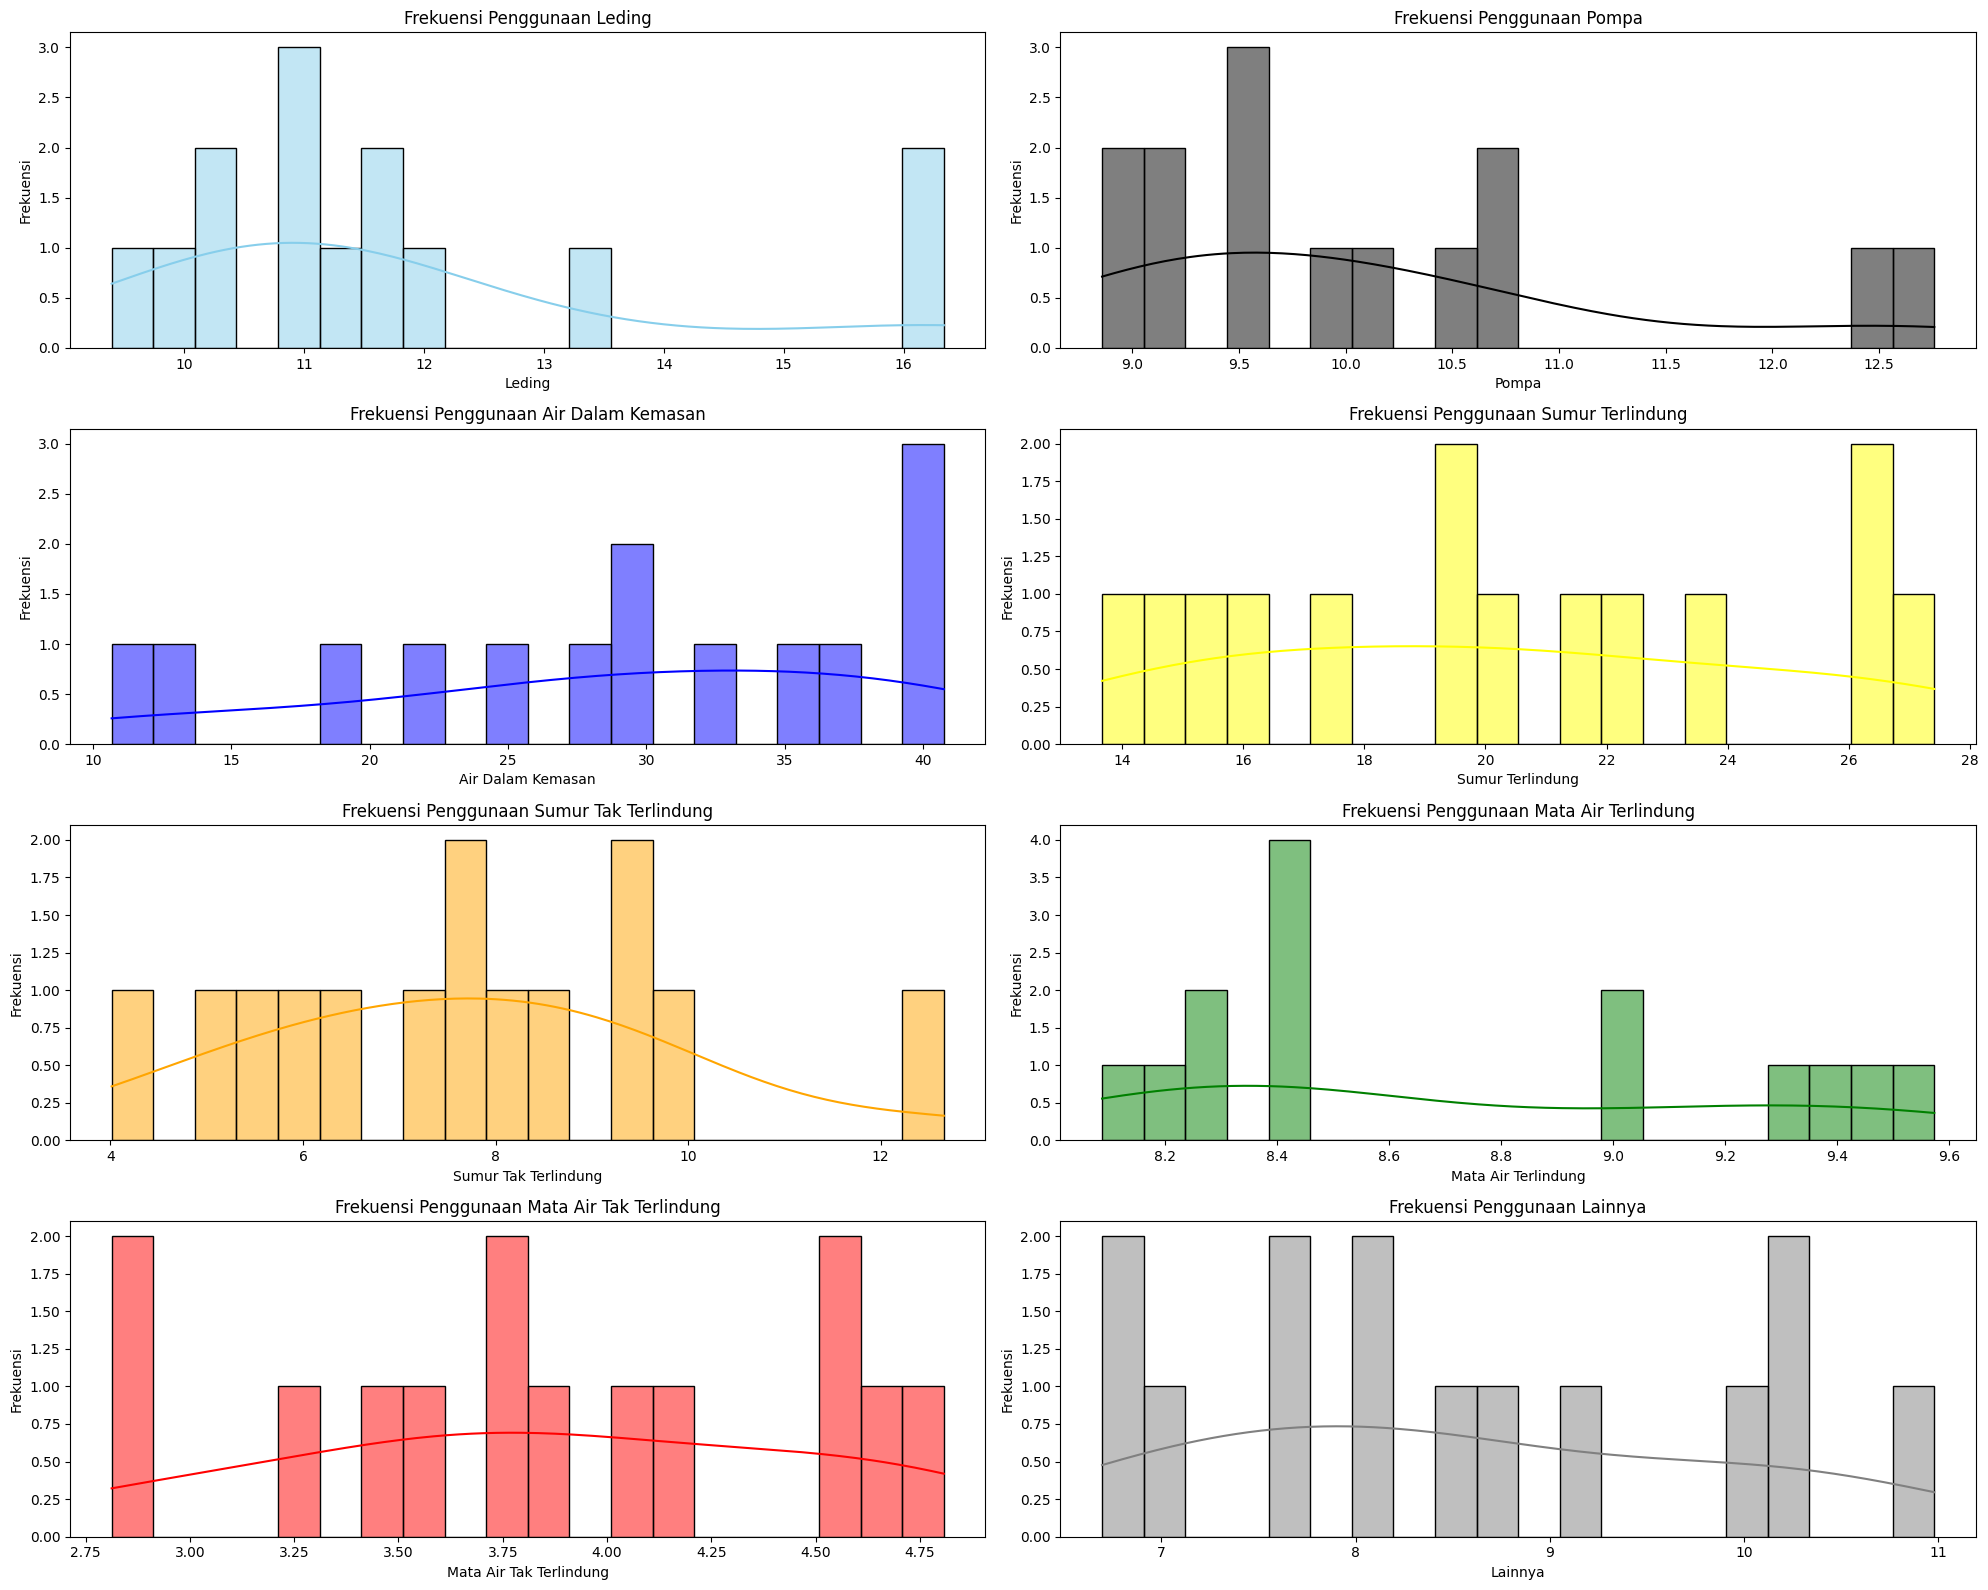

In [ ]:
plt.figure(figsize=(20, 16))

# Histogram Leding
plt.subplot(4, 2, 1)
sns.histplot(df3['Leding'], bins=20, kde=True, color='skyblue')
plt.title('Frekuensi Penggunaan Leding')
plt.xlabel('Leding')
plt.ylabel('Frekuensi')

# Histogram Pompa
plt.subplot(4, 2, 2)
sns.histplot(df3['Pompa'], bins=20, kde=True, color='Black')
plt.title('Frekuensi Penggunaan Pompa')
plt.xlabel('Pompa')
plt.ylabel('Frekuensi')

# Histogram Air Dalam Kemasan
plt.subplot(4, 2, 3)
sns.histplot(df3['Air Dalam Kemasan'], bins=20, kde=True, color='Blue')
plt.title('Frekuensi Penggunaan Air Dalam Kemasan')
plt.xlabel('Air Dalam Kemasan')
plt.ylabel('Frekuensi')

# Histogram Sumur Terlindung
plt.subplot(4, 2, 4)
sns.histplot(df3['Sumur Terlindung'], bins=20, kde=True, color='Yellow')
plt.title('Frekuensi Penggunaan Sumur Terlindung')
plt.xlabel('Sumur Terlindung')
plt.ylabel('Frekuensi')

# Histogram Sumur Tak Terlindung
plt.subplot(4, 2, 5)
sns.histplot(df3['Sumur Tak Terlindung'], bins=20, kde=True, color='Orange')
plt.title('Frekuensi Penggunaan Sumur Tak Terlindung')
plt.xlabel('Sumur Tak Terlindung')
plt.ylabel('Frekuensi')

# Histogram Mata Air Terlindung
plt.subplot(4, 2, 6)
sns.histplot(df3['Mata Air Terlindung'], bins=20, kde=True, color='Green')
plt.title('Frekuensi Penggunaan Mata Air Terlindung')
plt.xlabel('Mata Air Terlindung')
plt.ylabel('Frekuensi')

# Histogram untuk Mata Air Tak Terlindung
plt.subplot(4, 2, 7)
sns.histplot(df3['Mata Air Tak Terlindung'], bins=20, kde=True, color='Red')
plt.title('Frekuensi Penggunaan Mata Air Tak Terlindung')
plt.xlabel('Mata Air Tak Terlindung')
plt.ylabel('Frekuensi')

# Histogram untuk Lainnya
plt.subplot(4, 2, 8)
sns.histplot(df3['Lainnya'], bins=20, kde=True, color='Grey')
plt.title('Frekuensi Penggunaan Lainnya')
plt.xlabel('Lainnya')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

pada hasil dari histogram 8 penggunaan air rumah tangga frekuansi tertinggi yakni 4 dengan nilai 8,4 yaitu penggunaan mata air terlindungi ini menunjukkan bahwa frekuensi penggunaan tertinggi yakni penggunaan mata air terlindungi.

sedangkan histogram penggunaan rumah tangga lainnya memiliki frekuensi 2 - 3. dan beberapa nilai banyak yang memiliki frekuensi tertinggi dalam satu histogram

## Line Plot

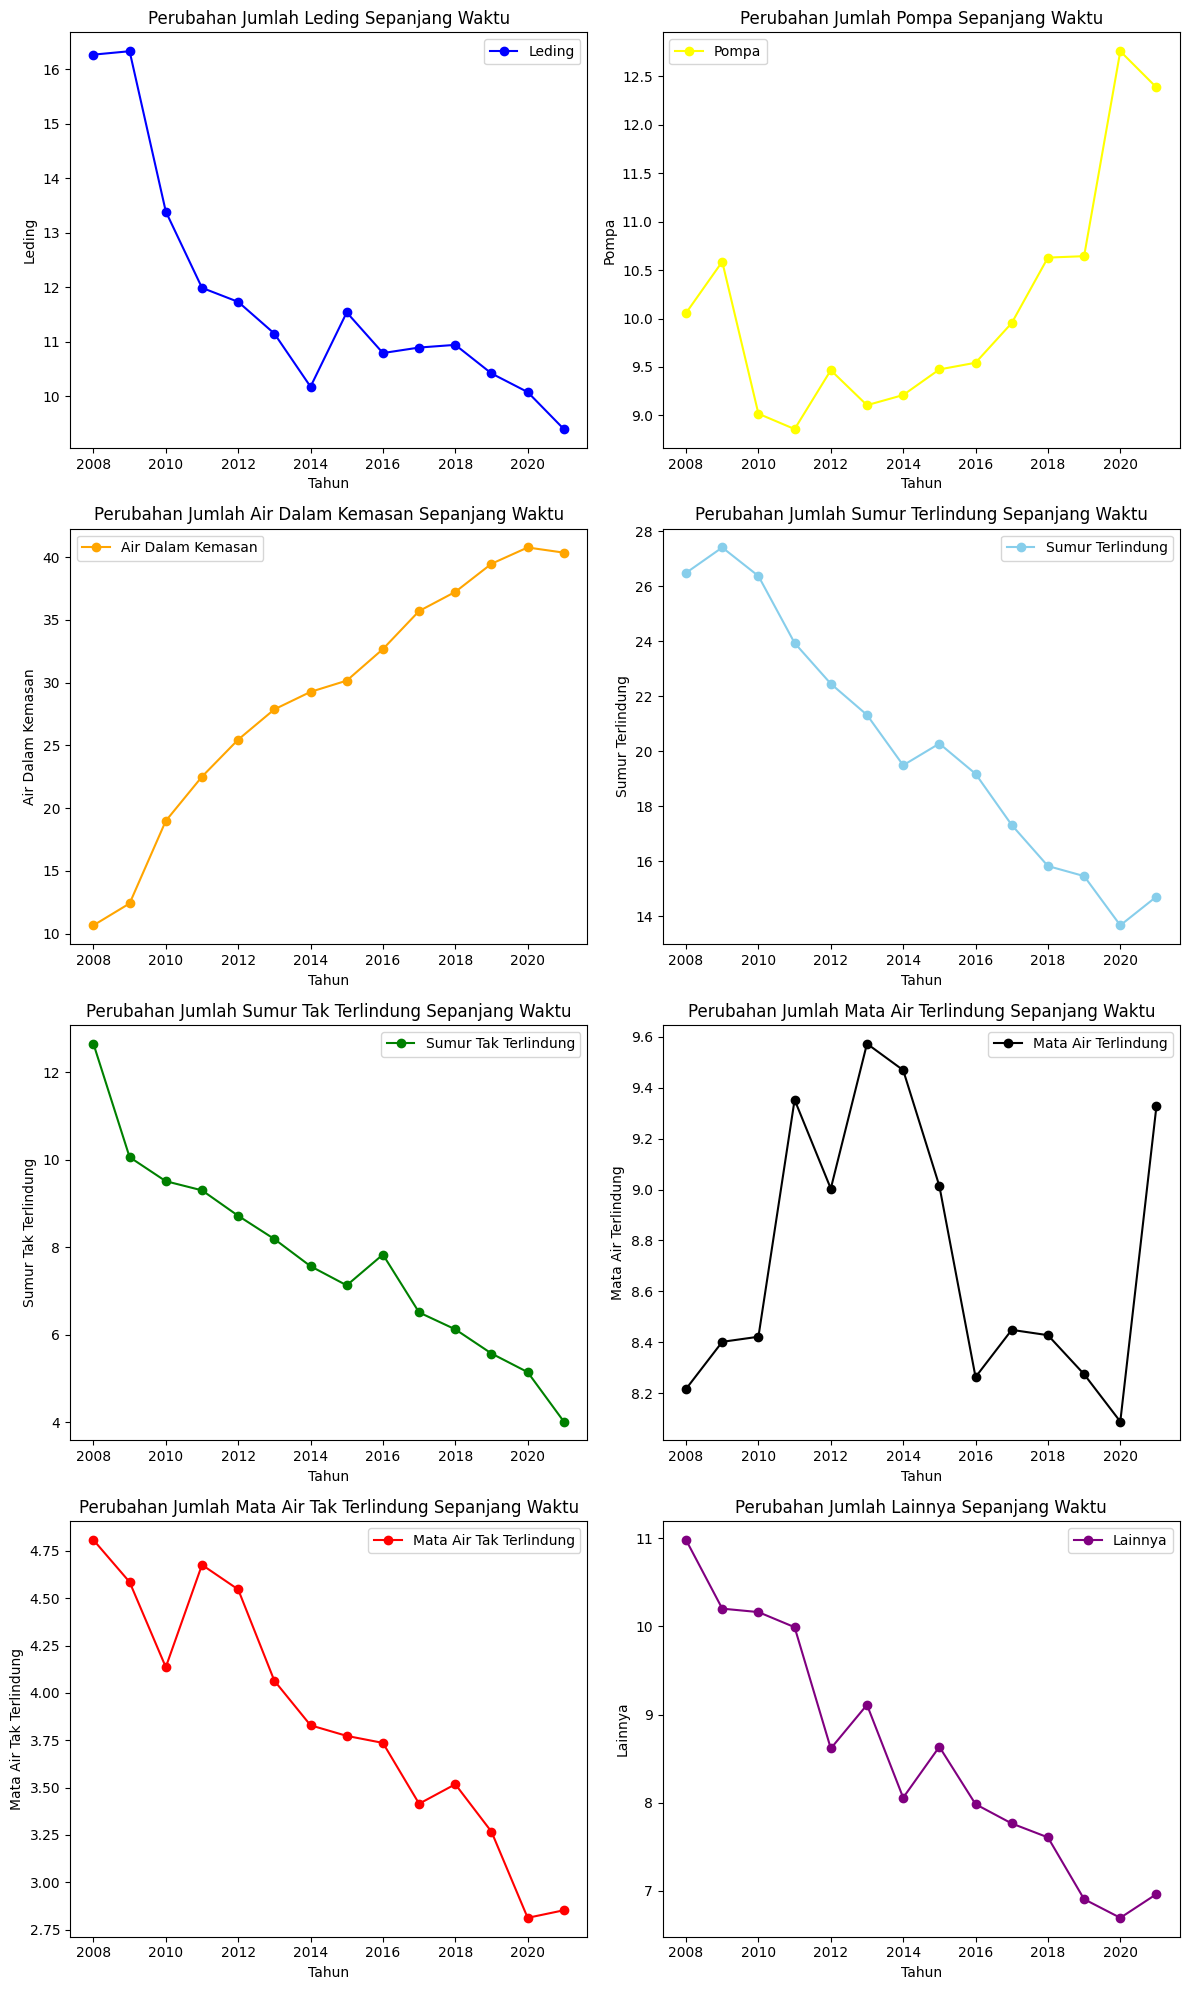

In [ ]:
plt.figure(figsize=(12, 20))

# Line Plot Leding
plt.subplot(4, 2, 1)
plt.plot(df3['Tahun'], df3['Leding'], label='Leding', marker='o', color='blue')
plt.title('Perubahan Jumlah Leding Sepanjang Waktu')
plt.xlabel('Tahun')
plt.ylabel('Leding')
plt.legend()

# Line Plot Pompa
plt.subplot(4, 2, 2)
plt.plot(df3['Tahun'], df3['Pompa'], label='Pompa', marker='o', color='Yellow')
plt.title('Perubahan Jumlah Pompa Sepanjang Waktu')
plt.xlabel('Tahun')
plt.ylabel('Pompa')
plt.legend()

# Line Plot Air Dalam Kemasan
plt.subplot(4, 2, 3)
plt.plot(df3['Tahun'], df3['Air Dalam Kemasan'], label='Air Dalam Kemasan', marker='o', color='Orange')
plt.title('Perubahan Jumlah Air Dalam Kemasan Sepanjang Waktu')
plt.xlabel('Tahun')
plt.ylabel('Air Dalam Kemasan')
plt.legend()

# Line Plot Sumur Terlindung
plt.subplot(4, 2, 4)
plt.plot(df3['Tahun'], df3['Sumur Terlindung'], label='Sumur Terlindung', marker='o', color='Skyblue')
plt.title('Perubahan Jumlah Sumur Terlindung Sepanjang Waktu')
plt.xlabel('Tahun')
plt.ylabel('Sumur Terlindung')
plt.legend()

# Line Plot Sumur Tak Terlindung
plt.subplot(4, 2, 5)
plt.plot(df3['Tahun'], df3['Sumur Tak Terlindung'], label='Sumur Tak Terlindung', marker='o', color='Green')
plt.title('Perubahan Jumlah Sumur Tak Terlindung Sepanjang Waktu')
plt.xlabel('Tahun')
plt.ylabel('Sumur Tak Terlindung')
plt.legend()

# Line Plot Mata Air Terlindung
plt.subplot(4, 2, 6)
plt.plot(df3['Tahun'], df3['Mata Air Terlindung'], label='Mata Air Terlindung', marker='o', color='Black')
plt.title('Perubahan Jumlah Mata Air Terlindung Sepanjang Waktu')
plt.xlabel('Tahun')
plt.ylabel('Mata Air Terlindung')
plt.legend()

# Line Plot Mata Air Tak Terlindung
plt.subplot(4, 2, 7)
plt.plot(df3['Tahun'], df3['Mata Air Tak Terlindung'], label='Mata Air Tak Terlindung', marker='o', color='Red')
plt.title('Perubahan Jumlah Mata Air Tak Terlindung Sepanjang Waktu')
plt.xlabel('Tahun')
plt.ylabel('Mata Air Tak Terlindung')
plt.legend()

# Line Plot Lainnya
plt.subplot(4, 2, 8)
plt.plot(df3['Tahun'], df3['Lainnya'], label='Lainnya', marker='o', color='Purple')
plt.title('Perubahan Jumlah Lainnya Sepanjang Waktu')
plt.xlabel('Tahun')
plt.ylabel('Lainnya')
plt.legend()

plt.tight_layout()
plt.show()

Dari hasil line plot diatas dapat diketahui bahwa beberapa penggunaan sumber air Rumah Tangga mengalami penurunan yang signifikan seperti :

1. Leding
2. Sumur terlindungi
3. Sumur tak terlindungi
4. Mata air tak terlindungi
5. Lainnya

Sedangkan penggunaan sumber air rumah tangga yang mengalami naik turun yakni mata air terlindung.

Lalu pada sumber air rumah tangga pompa mengalami penurunan pada tahun 2010 dan setelah itu selalu mengalami peningkatan

Dan pada penggunaan sumber air rumah tangga  yakni air rumah tangga selalu mengalami peningkatan karena banyak masyarakat yang lebih suka menggunakan air kemasan untuk segala kegiatan sehingga penggunaan nya pun selalu meningkat

## Density Plot

<ipython-input-24-8aa4637da3fe>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df3['Leding'], shade=True, color='blue')
<ipython-input-24-8aa4637da3fe>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df3['Pompa'], shade=True, color='green')
<ipython-input-24-8aa4637da3fe>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df3['Air Dalam Kemasan'], shade=True, color='Yellow')
<ipython-input-24-8aa4637da3fe>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df3['Sumur Terlindung'], shade=True, colo

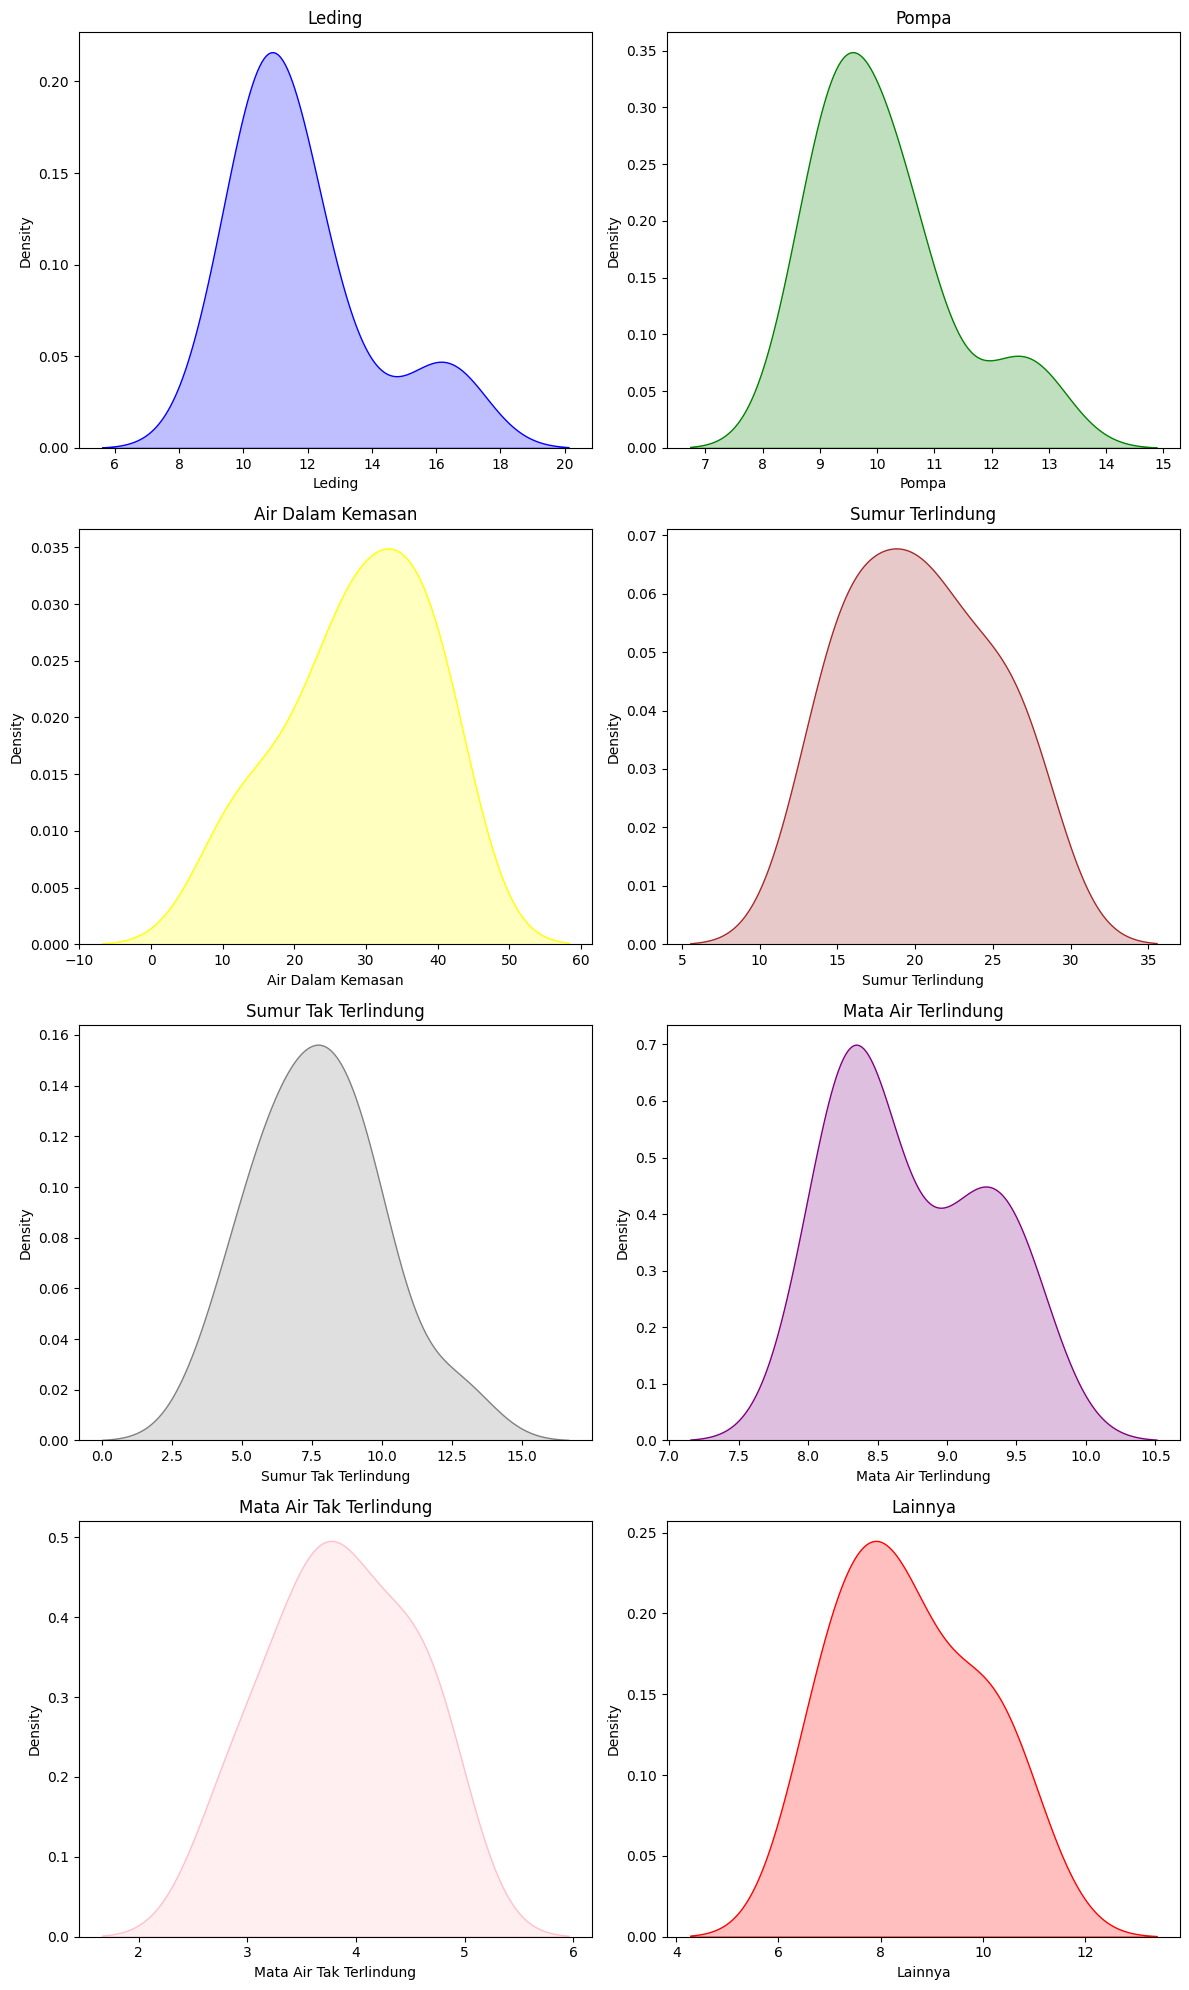

In [ ]:
plt.figure(figsize=(12, 20))

# Density Plot Leding
plt.subplot(4, 2, 1)
sns.kdeplot(df3['Leding'], shade=True, color='blue')
plt.title('Leding')
plt.xlabel('Leding')

# Density Plot Pompa
plt.subplot(4, 2, 2)
sns.kdeplot(df3['Pompa'], shade=True, color='green')
plt.title('Pompa')
plt.xlabel('Pompa')

# Density Plot Air Dalam Kemasan
plt.subplot(4, 2, 3)
sns.kdeplot(df3['Air Dalam Kemasan'], shade=True, color='Yellow')
plt.title('Air Dalam Kemasan')
plt.xlabel('Air Dalam Kemasan')

# Density Plot Sumur Terlindung
plt.subplot(4, 2, 4)
sns.kdeplot(df3['Sumur Terlindung'], shade=True, color='Brown')
plt.title('Sumur Terlindung')
plt.xlabel('Sumur Terlindung')

# Density Plot Sumur Tak Terlindung
plt.subplot(4, 2, 5)
sns.kdeplot(df3['Sumur Tak Terlindung'], shade=True, color='Grey')
plt.title('Sumur Tak Terlindung')
plt.xlabel('Sumur Tak Terlindung')

# Density Plot Mata Air Terlindung
plt.subplot(4, 2, 6)
sns.kdeplot(df3['Mata Air Terlindung'], shade=True, color='Purple')
plt.title('Mata Air Terlindung')
plt.xlabel('Mata Air Terlindung')

# Density Plot Mata Air Tak Terlindung
plt.subplot(4, 2, 7)
sns.kdeplot(df3['Mata Air Tak Terlindung'], shade=True, color='Pink')
plt.title('Mata Air Tak Terlindung')
plt.xlabel('Mata Air Tak Terlindung')

# Density Plot Lainnya
plt.subplot(4, 2, 8)
sns.kdeplot(df3['Lainnya'], shade=True, color='Red')
plt.title('Lainnya')
plt.xlabel('Lainnya')

plt.tight_layout()
plt.show()

#Exploratory Data Analysis 2 - Bivariate Analysis With Additional Data

## Correlation Matrix

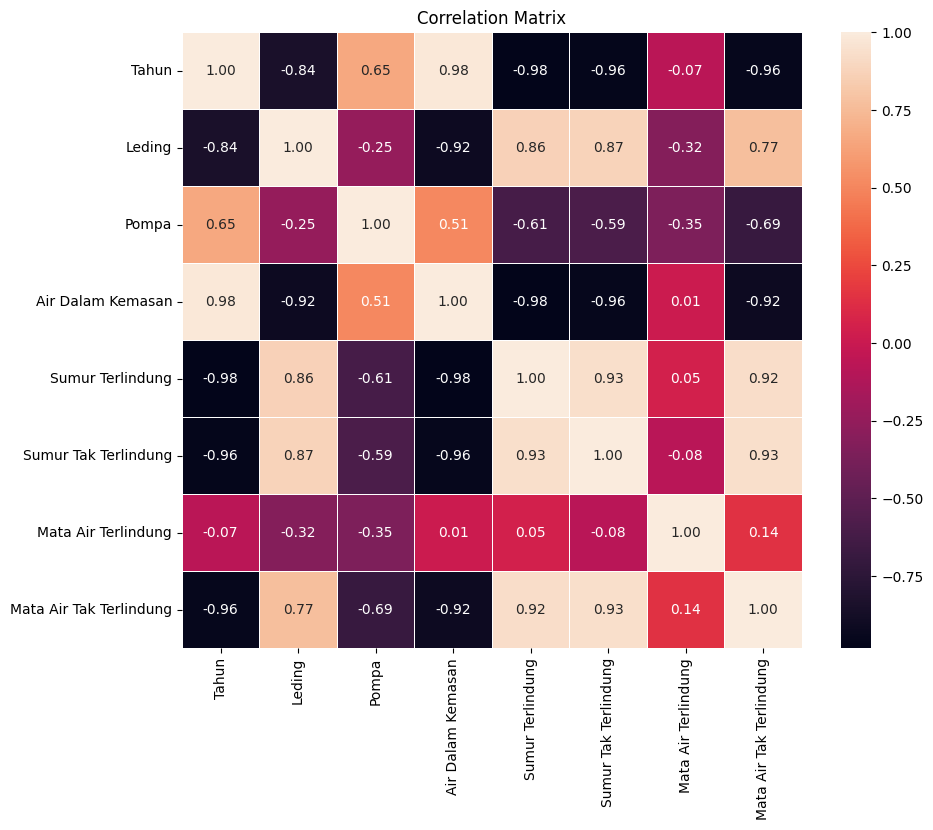

In [ ]:
import seaborn as sns

# Menghitung matriks korelasi antara variabel-variabel
correlation_matrix = df3[['Tahun', 'Leding', 'Pompa', 'Air Dalam Kemasan', 'Sumur Terlindung', 'Sumur Tak Terlindung', 'Mata Air Terlindung', 'Mata Air Tak Terlindung']].corr()

# Memvisualisasikan matriks korelasi dalam bentuk heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


Melalui analisis korelasi variabel dalam dataset, heatmap matriks korelasi menyoroti seberapa eratnya hubungan antara 'Tahun', 'Leding', 'Pompa', 'Air Dalam Kemasan', 'Sumur Terlindung', 'Sumur Tak Terlindung', 'Mata Air Terlindung', dan 'Mata Air Tak Terlindung'. Warna pada heatmap memberikan gambaran visual tentang kekuatan hubungan antar pasangan variabel: warna cerah menandakan korelasi yang lebih kuat, sementara warna gelap menandakan korelasi yang lebih lemah atau tidak ada korelasi sama sekali.

Analisis ini memungkinkan identifikasi cepat tentang pasangan variabel yang memiliki hubungan erat atau sebaliknya. Korelasi yang tinggi antara pasangan variabel bisa menunjukkan hubungan atau pola yang signifikan di antara mereka.

Dengan memahami dan menganalisis heatmap matriks korelasi ini, kita dapat mendapatkan wawasan yang lebih mendalam tentang hubungan antara 'Tahun', 'Leding', 'Pompa', 'Air Dalam Kemasan', 'Sumur Terlindung', 'Sumur Tak Terlindung', 'Mata Air Terlindung', dan 'Mata Air Tak Terlindung' dalam dataset, yang bermanfaat dalam proses pengambilan keputusan dan analisis lebih lanjut.

## Scatter Plot

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:395: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, **kws)


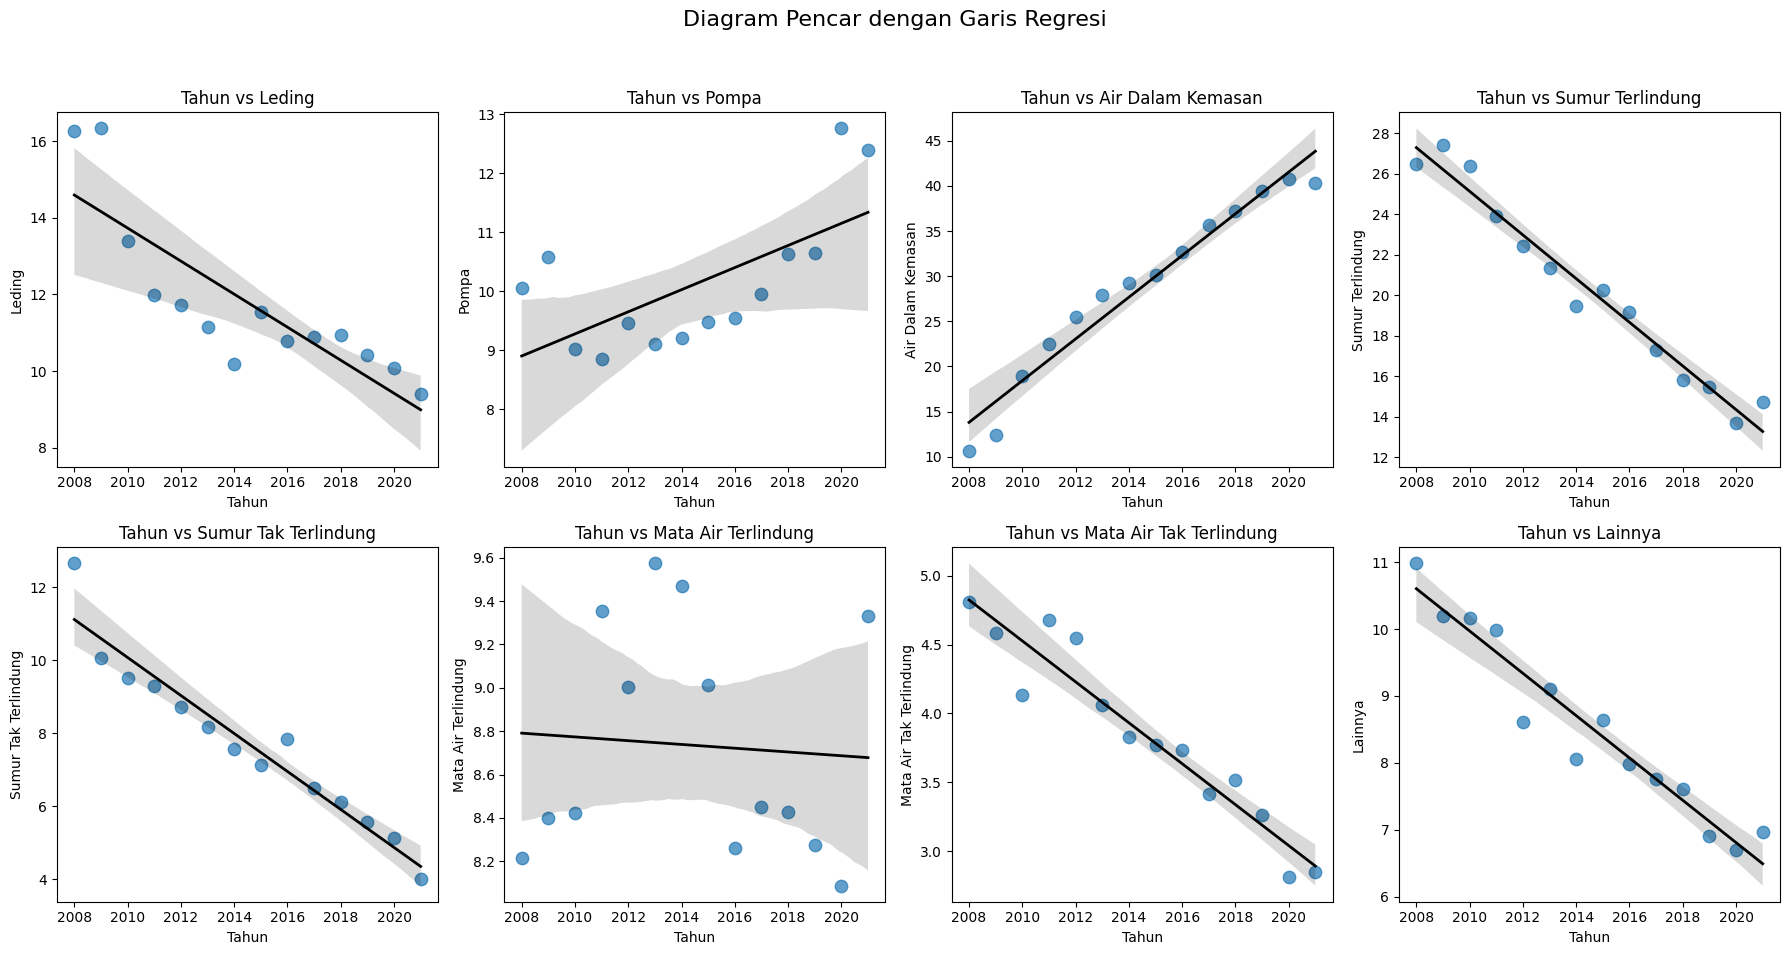

In [ ]:
# Mendefinisikan colormap untuk konsistensi warna yang menarik secara visual
color_palette = 'viridis'

# Menyiapkan figur matplotlib dengan 2 baris dan 4 kolom dan menentukan ukuran keseluruhan figur
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
fig.suptitle('Diagram Pencar dengan Garis Regresi', fontsize=16)

# Membuat scatter plot dengan skema warna yang konsisten dari colormap yang telah ditentukan
for i in range(2):
    for j in range(4):  # Disesuaikan untuk melalui semua 4 kolom
        index = i * 4 + j  # Menghitung indeks untuk mengakses kolom-kolom dalam df3
        if index < df3.shape[1] - 1:  # Memeriksa apakah indeks berada dalam rentang kolom yang tersedia
            sns.regplot(ax=axes[i, j],
                        x='Tahun',
                        y=df3.iloc[:, index + 1],
                        data=df3,
                        scatter_kws={'s': 80, 'alpha': 0.7, 'cmap': color_palette},
                        line_kws={'color': 'black', 'linewidth': 2})
            axes[i, j].set_title(f'Tahun vs {df3.columns[index + 1]}')
        else:
            fig.delaxes(axes[i, j])  # Menghapus subplot kosong jika tidak ada kolom lagi yang akan diplot

# Menyesuaikan tata letak
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Menampilkan plot
plt.show()


Dalam rentang tahun 2008 hingga 2021, terlihat adanya kecenderungan kenaikan penggunaan air rumah tangga dalam kemasan. Plot menunjukkan peningkatan yang stabil dari tahun ke tahun, mencerminkan perubahan signifikan dalam konsumsi air tersebut. Peningkatan ini dapat menandakan perubahan perilaku konsumen atau meningkatnya permintaan terhadap air dalam kemasan selama periode waktu yang diamati. Fenomena ini mungkin menjadi hasil dari faktor-faktor seperti perubahan kesadaran akan kesehatan, tren gaya hidup, atau strategi pemasaran yang berhasil dalam memengaruhi preferensi konsumen terhadap air kemasan. Perlu adanya analisis lebih lanjut untuk memahami secara tepat faktor-faktor yang mendasarinya serta implikasi dari kenaikan ini, baik dari sudut pandang bisnis maupun lingkungan. Pemahaman yang lebih dalam tentang tren ini dapat membantu dalam menyusun strategi yang lebih efektif terkait pengelolaan dan penggunaan air dalam kemasan serta merespons perubahan-perubahan yang terjadi di masa mendatang.

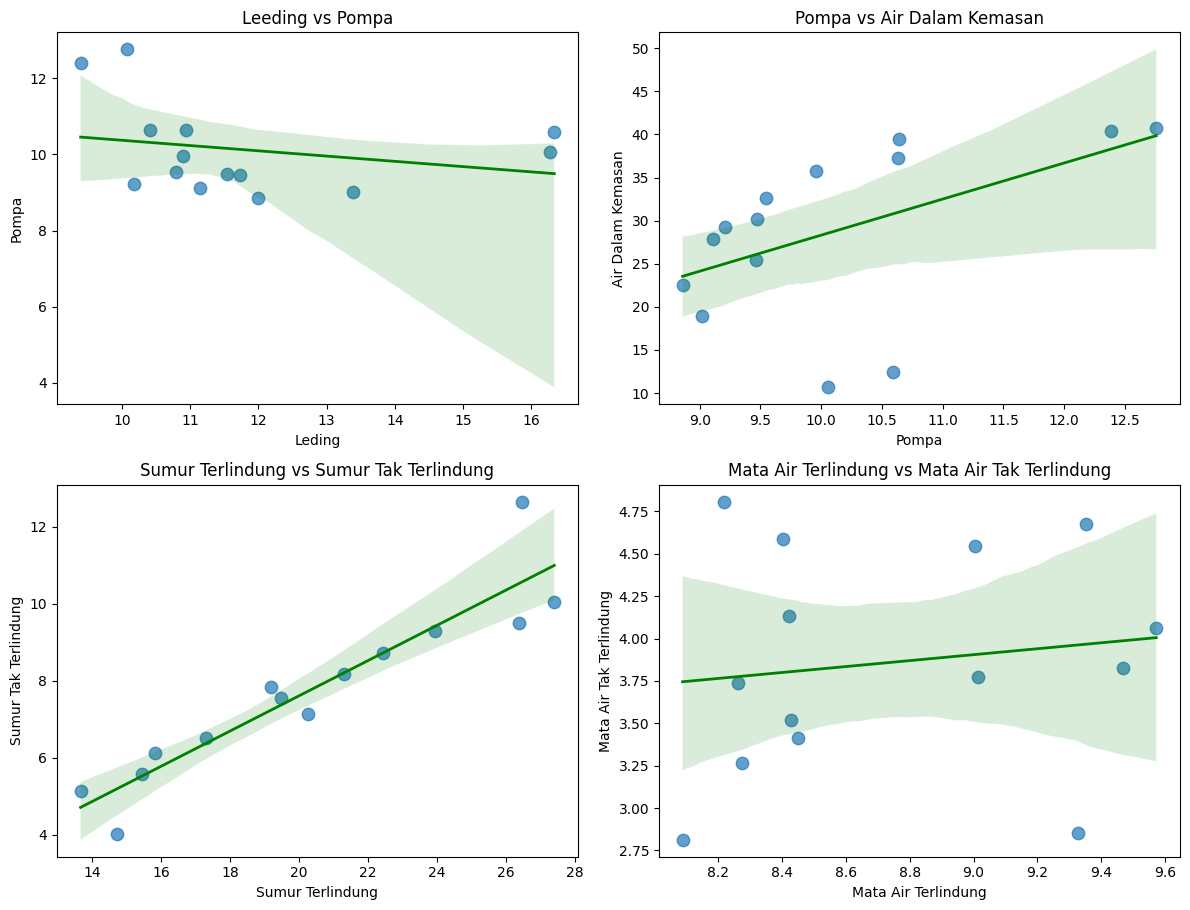

In [ ]:
# Menyiapkan figure matplotlib dengan 2 baris dan 2 kolom, menyesuaikan ukuran keseluruhan figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Scatter Plot 1: Leding vs Pompa
sns.regplot(ax=axes[0, 0],
            x='Leding',
            y='Pompa',
            data=df3,
            scatter_kws={'s': 80, 'alpha': 0.7},  # Mengubah ukuran dan transparansi titik
            line_kws={'color': 'green', 'linewidth': 2})  # Mengubah warna dan ketebalan garis regresi
axes[0, 0].set_title('Leeding vs Pompa')

# Scatter Plot 2: Pompa vs Air Dalam Kemasan
sns.regplot(ax=axes[0, 1],
            x='Pompa',
            y='Air Dalam Kemasan',
            data=df3,
            scatter_kws={'s': 80, 'alpha': 0.7},  # Mengubah ukuran dan transparansi titik
            line_kws={'color': 'green', 'linewidth': 2})  # Mengubah warna dan ketebalan garis regresi
axes[0, 1].set_title('Pompa vs Air Dalam Kemasan')

# Scatter Plot 3: Sumur Terlindung vs Sumur Tak Terlindung
sns.regplot(ax=axes[1, 0],
            x='Sumur Terlindung',
            y='Sumur Tak Terlindung',
            data=df3,
            scatter_kws={'s': 80, 'alpha': 0.7},  # Mengubah ukuran dan transparansi titik
            line_kws={'color': 'green', 'linewidth': 2})  # Mengubah warna dan ketebalan garis regresi
axes[1, 0].set_title('Sumur Terlindung vs Sumur Tak Terlindung')

# Scatter Plot 4: Mata Air Terlindung vs Mata Air Tak Terlindung
sns.regplot(ax=axes[1, 1],
            x='Mata Air Terlindung',
            y='Mata Air Tak Terlindung',
            data=df3,
            scatter_kws={'s': 80, 'alpha': 0.7},  # Mengubah ukuran dan transparansi titik
            line_kws={'color': 'green', 'linewidth': 2})  # Mengubah warna dan ketebalan garis regresi
axes[1, 1].set_title('Mata Air Terlindung vs Mata Air Tak Terlindung')

# Penyesuaian layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Menyesuaikan tata letak plot

# Menampilkan plot
plt.show()


## Box Plot

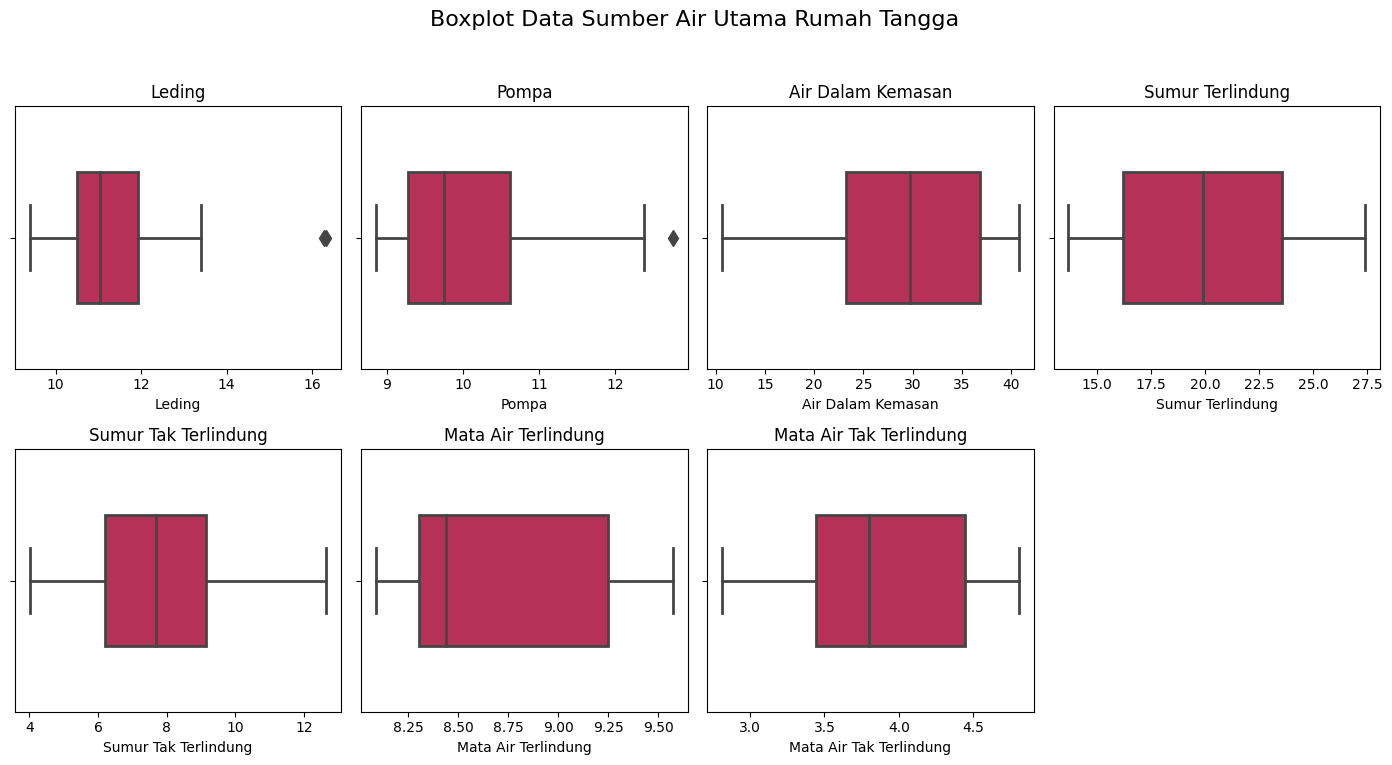

In [ ]:
# Menyiapkan gambar matplotlib
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 8))
fig.suptitle('Boxplot Data Sumber Air Utama Rumah Tangga', fontsize=16)

# Variabel yang akan diplot
variables = ['Leding', 'Pompa', 'Air Dalam Kemasan', 'Sumur Terlindung',
             'Sumur Tak Terlindung', 'Mata Air Terlindung', 'Mata Air Tak Terlindung']

# Memplot setiap variabel
for i, variable in enumerate(variables):
    row = i // 4
    col = i % 4
    sns.boxplot(ax=axes[row, col],
                x=df3[variable],
                palette='rocket',
                width=0.5,
                linewidth=2,
                fliersize=8)
    axes[row, col].set_title(variable)

# Menghapus subplot kosong terakhir
if len(variables) < 8:
    fig.delaxes(axes.flatten()[-1])

# Penyesuaian layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Menampilkan plot
plt.show()


**Boxplot Leding**

Boxplot ini menunjukkan variasi data yang signifikan dalam penggunaan sumber air melalui "Leding" untuk rumah tangga. Potensi adanya pencilan (outliers) dapat dilihat dari panjang garis ekstrem atas dan bawah, yang menandakan perbedaan yang signifikan di dalam dataset.

**Boxplot Pompa**

Plot boxplot untuk "Pompa" menunjukkan bahwa mayoritas rumah tangga menggunakan sumber air ini dengan konsistensi yang lebih tinggi dibandingkan dengan beberapa sumber air lainnya. Variasi data di sekitar median tampak lebih rendah dibandingkan dengan beberapa variabel lainnya.

**Boxplot Air Dalam Kemasan**

Air Dalam Kemasan: Boxplot menunjukkan bahwa penggunaan "Air Dalam Kemasan" memiliki nilai median yang relatif tinggi, namun memiliki rentang yang lebih kecil dari nilai-nilai outlier yang signifikan. Hal ini menunjukkan bahwa sebagian besar rumah tangga menggunakan jumlah air dalam kemasan yang serupa.

**Boxplot Sumur Terlindungi dan Tak Terlindungi**

Sumur Terlindung dan Tak Terlindung: Dari plot boxplot, terlihat perbedaan yang signifikan dalam penggunaan "Sumur Terlindung" dan "Sumur Tak Terlindung". Median dari "Sumur Terlindung" mungkin lebih stabil dibandingkan dengan "Tak Terlindung", dan ada potensi adanya pencilan di dalam data "Tak Terlindung".

**Boxplot Mata Air Terlindungi dan Tak Terlindungi**

Mata Air Terlindung dan Tak Terlindung: Plot menunjukkan perbedaan yang signifikan antara penggunaan "Mata Air Terlindung" dan "Tak Terlindung". Variabilitas dalam penggunaan "Tak Terlindung" tampak lebih besar dibandingkan dengan "Terlindung", dan adanya pencilan yang signifikan juga terlihat di "Tak Terlindung".

# Supervised Learning

## Simple Linear Regression

Terdapat nilai 'NaN' yang bisa berarti nilai yang hilang atau penarikan air tawar yang tidak dilaporkan. Untuk analisis ini, nilai tersebut akan diganti dengan 0, yang berarti penarikan air tawar yang tidak dilaporkan dan juga akan bermanfaat dalam pembuatan data.

In [ ]:
# Handle missing values
df.fillna(value = 0, inplace = True)

df.head()

,year,freshwater_withdrawals,forest_area_sq_km,forest_area_percent,water_stress
0,1990,3.681889,1185450.0,65.437714,9.914139
1,1991,3.874804,1168185.0,64.484674,10.433596
2,1992,4.067719,1150920.0,63.531633,10.953053
3,1993,4.260634,1133655.0,62.578592,11.472510
4,1994,4.453529,1116390.0,61.625551,11.991967


### Model Prediksi Persentase Luas Area Hutan Berdasarkan Tahun

In [ ]:
# Memilih kolom 'year' sebagai variabel independen (fitur/predictor)
X = df[['year']]  # Variabel X berisi data tahun yang akan digunakan sebagai fitur atau predictor dalam model

# Memilih kolom 'forest_area_percent' sebagai variabel dependen (target)
Y = df[['forest_area_percent']]  # Variabel Y berisi persentase area hutan, menjadi variabel yang ingin diprediksi

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Atur seed untuk mengontrol randomness dalam pembagian data (opsional, untuk reproduktibilitas hasil)
np.random.seed(42)

# Memisahkan data menjadi data latih dan data uji dengan rasio 70:30
# x dan y adalah variabel-variabel yang berisi fitur dan target yang akan dipisahkan
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# X_train: data fitur untuk pelatihan model
# X_test: data fitur untuk evaluasi model
# Y_train: label/target yang sesuai dengan data pelatihan
# Y_test: label/target yang sesuai dengan data evaluasi

In [ ]:
# Inisialisasi model regresi linear
model = LinearRegression()

# Inisialisasi model regresi linear
rmodel = LinearRegression()

# Melatih model menggunakan data pelatihan
rmodel.fit(X_train, Y_train)

# Menampilkan koefisien dan intercept dari model
print("Coef", rmodel.coef_)
print("Intercept", rmodel.intercept_)

Coef [[-0.49119792]]
Intercept [1039.99074855]


In [ ]:
# Melakukan prediksi menggunakan data pengujian
Y_predict = rmodel.predict(X_test)

# Menampilkan hasil prediksi
print(Y_predict)

[[48.26215561]
 [55.13892644]
 [50.71814519]
 [54.1565306 ]
 [58.57731185]
 [58.08611393]
 [47.77095769]
 [50.22694727]
 [56.61252018]
 [62.50689518]]


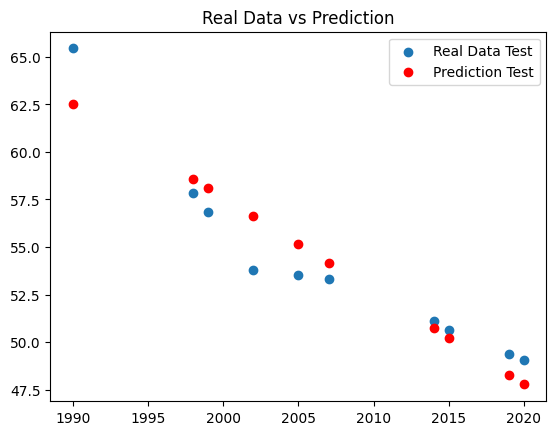

In [ ]:
import matplotlib.pyplot as plt

# Judul plot
plt.title('Real Data vs Prediction')

# Scatter plot untuk data asli (Real Data Test)
plt.scatter(X_test, Y_test, label="Real Data Test")

# Scatter plot untuk prediksi (Prediction Test) dengan warna merah
plt.scatter(X_test, Y_predict, color='red', label='Prediction Test')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [ ]:
# Menampilkan lima baris pertama dari data pengujian
print(X_test.head())

    year
29  2019
15  2005
24  2014
17  2007
8   1998


In [ ]:
# Membuat DataFrame untuk melakukan forecasting pada kolom 'year'
df1_forecasting = pd.DataFrame({
    'year': [2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031]
})

# Melakukan prediksi pada kolom 'year' menggunakan model yang sudah dilatih
prediction_forest_area = rmodel.predict(df1_forecasting[['year']])

# menambahkan hasil forecasting ke dalam dataframe df_forecasting
df1_forecasting['forest_area_percent'] = prediction_forest_area
df1_forecasting

,year,forest_area_percent
0,2022,46.788562
1,2023,46.297364
2,2024,45.806166
3,2025,45.314968
4,2026,44.823770
5,2027,44.332572
6,2028,43.841374
7,2029,43.350176
8,2030,42.858979
9,2031,42.367781


In [ ]:
df1_forecasting.to_csv('forecasting.csv',index=False)

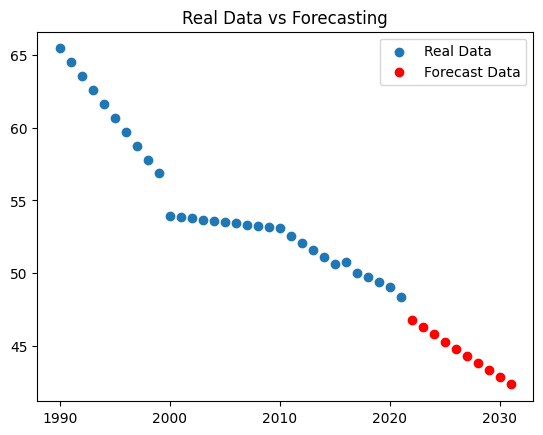

In [ ]:
import matplotlib.pyplot as plt

# Judul plot
plt.title('Real Data vs Forecasting')

# Scatter plot untuk data asli (Real Data)
plt.scatter(X, Y, label="Real Data")

# Scatter plot untuk hasil forecasting (Forecast Data) dengan warna merah
plt.scatter(df1_forecasting['year'], df1_forecasting['forest_area_percent'], color='red', label="Forecast Data")

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

Plot ini memvisualisasikan perbandingan antara data aktual mengenai persentase luas hutan (ditandai dengan titik-titik biru) dengan hasil forecasting (peramalan) mengenai persentase luas hutan (ditandai dengan titik-titik merah) hingga tahun 2031.

Dari plot ini, kita dapat melihat sejauh mana hasil forecasting (titik-titik merah) cocok atau mengikuti trend dari data aktual (titik-titik biru). Perbandingan tersebut menggambarkan baiknya kualitas model peramalan dalam memprediksi persentase luas hutan di masa mendatang. Terdapat informasi mengenai pola yang cenderung berlanjut atau pun terdapat perbedaan signifikan yang mungkin mencerminkan anomali.

Evaluasi ini membantu untuk mengevaluasi keandalan dan kecukupan model dalam melakukan prediksi terhadap data di masa mendatang. Insight dari plot ini membantu dalam menilai seberapa andal model dalam memprediksi nilai persentase luas hutan di masa mendatang dan apakah diperlukan perbaikan atau pembaruan model."

Penyesuaian tersebut bertujuan untuk memberikan informasi yang lebih spesifik dan terperinci mengenai apa yang bisa diambil dari visualisasi yang telah dilakukan

### Model Prediksi Pengambilan Air Tawar Berdasarkan Presentase Luas Hutan

In [ ]:
# Memilih kolom 'forest_area_percent' sebagai variabel independen (fitur/predictor)
x = df[['forest_area_percent']]

# Memilih kolom 'freshwater_withdrawals' sebagai variabel dependen (target)
y = df[['freshwater_withdrawals']]

In [ ]:
# Atur seed untuk mengontrol randomness dalam pembagian data (opsional, untuk reproduktibilitas hasil)
np.random.seed(42)

# Memisahkan data menjadi data latih dan data uji dengan rasio 70:30
# x dan y adalah variabel-variabel yang berisi fitur dan target yang akan dipisahkan
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# x_train: data fitur untuk pelatihan model
# x_test: data fitur untuk evaluasi model
# y_train: label/target yang sesuai dengan data pelatihan
# y_test: label/target yang sesuai dengan data evaluasi

In [ ]:
# Inisialisasi model regresi linear
rmodel = LinearRegression()

# Melatih model menggunakan data pelatihan
rmodel.fit(x_train, y_train)

# Menampilkan koefisien dan intercept dari model
print("Coef", rmodel.coef_)
print("Intercept", rmodel.intercept_)

Coef [[-0.33692926]]
Intercept [25.51204197]


In [ ]:
# Melakukan prediksi menggunakan data pengujian
y_predict = rmodel.predict(x_test)

# Menampilkan hasil prediksi
print(y_predict)

[[8.86965809]
 [7.48231856]
 [8.29263466]
 [7.54049054]
 [6.03301964]
 [6.35412695]
 [8.97832318]
 [8.4588562 ]
 [7.3950606 ]
 [3.46416115]]


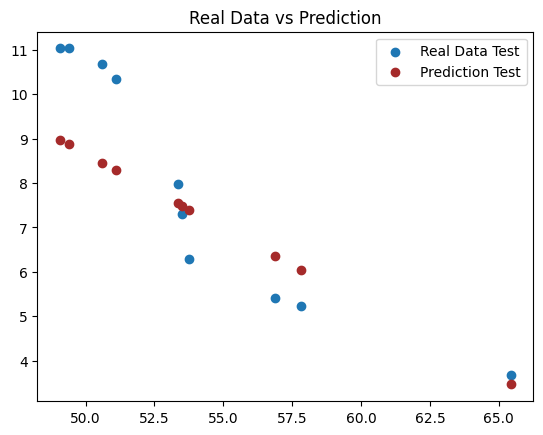

In [ ]:
# Judul plot
plt.title('Real Data vs Prediction')

# Scatter plot untuk data asli (Real Data Test)
plt.scatter(x_test, y_test, label="Real Data Test")

# Scatter plot untuk prediksi (Prediction Test) dengan warna merah
plt.scatter(x_test, y_predict, color='brown', label='Prediction Test')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [ ]:
# Menampilkan lima baris pertama dari data pengujian
print(x_test.head())

    forest_area_percent
29            49.394296
15            53.511895
24            51.106892
17            53.339242
8             57.813388


In [ ]:
# membuat dataframe
df2_forecasting = pd.DataFrame({
    'forest_area_percent': [48.36194487,46.788562,46.297364,45.806166,45.314968,44.823770,44.332572,43.841374,43.350176,42.858979,42.367781]
})
df2_forecasting.head()

# Melakukan prediksi pada kolom 'year' menggunakan model yang sudah dilatih
prediction_forest_area = rmodel.predict(df2_forecasting[['forest_area_percent']])

# menambahkan hasil forecasting ke dalam dataframe df_forecasting
df2_forecasting['freshwater_withdrawals'] = prediction_forest_area
df2_forecasting

,forest_area_percent,freshwater_withdrawals
0,48.361945,9.217488
1,46.788562,9.747606
2,46.297364,9.913105
3,45.806166,10.078604
4,45.314968,10.244103
5,44.823770,10.409602
6,44.332572,10.575101
7,43.841374,10.740600
8,43.350176,10.906099
9,42.858979,11.071598


In [ ]:
df2_forecasting.to_csv('forecasting_freshwater.csv',index=False)

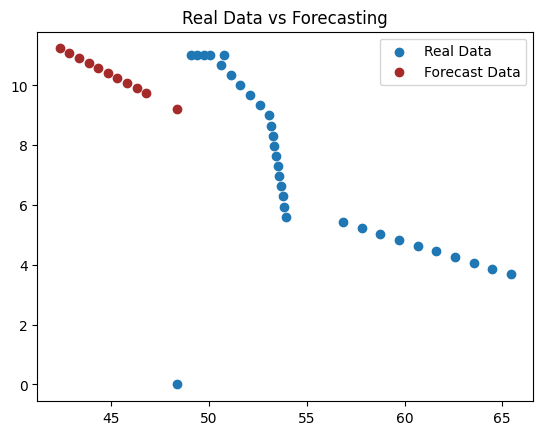

In [ ]:
# Judul plot
plt.title('Real Data vs Forecasting')

# Scatter plot untuk data asli (Real Data)
plt.scatter(x, y, label="Real Data")

# Scatter plot untuk hasil forecasting (Forecast Data) dengan warna merah
plt.scatter(df2_forecasting['forest_area_percent'], df2_forecasting['freshwater_withdrawals'], color='brown', label="Forecast Data")

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

Plot 'Real Data vs Forecasting' memperlihatkan perbandingan antara data aktual terkait persentase luas hutan dengan hasil forecasting terkait pengambilan air tawar. Dari plot ini, terlihat bahwa hasil forecasting (titik-titik berwarna coklat) secara visual membandingkan pola atau trend dengan data aktual (titik-titik berwarna biru). Jika terlihat kesesuaian yang baik antara kedua kelompok titik, hal ini menunjukkan bahwa model peramalan mungkin cukup andal dalam memprediksi pengambilan air tawar berdasarkan perubahan persentase luas hutan. Selain itu, identifikasi titik-titik yang jauh dari pola umum dapat mengindikasikan adanya anomali atau nilai-nilai yang signifikan dan perlu diteliti lebih lanjut. Plot ini memberikan gambaran mengenai hubungan di antara kedua variabel serta potensi model dalam memprediksi nilai pengambilan air tawar di masa depan berdasarkan perubahan persentase luas hutan.

### Model Prediksi Tingkat Stress Air Berdasarkan Pengambilan Air Tawar

In [ ]:
# Memilih kolom 'freshwater_withdrawals' sebagai variabel independen (fitur/predictor)
x3 = df[['freshwater_withdrawals']]

# Memilih kolom 'water_stress' sebagai variabel dependen (target)
y3 = df[['water_stress']]

In [ ]:
# Atur seed untuk mengontrol randomness dalam pembagian data (opsional, untuk reproduktibilitas hasil)
np.random.seed(42)

# Memisahkan data menjadi data latih dan data uji dengan rasio 70:30
# x3 dan y3 adalah variabel-variabel yang berisi fitur dan target yang akan dipisahkan
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3)

# x3_train: data fitur untuk pelatihan model
# x3_test: data fitur untuk evaluasi model
# y3_train: label/target yang sesuai dengan data pelatihan
# y3_test: label/target yang sesuai dengan data evaluasi

In [ ]:
# Inisialisasi model regresi linear
rmodel = LinearRegression()

# Melatih model menggunakan data pelatihan
rmodel.fit(x3_train, y3_train)

# Menampilkan koefisien dan intercept dari model
print("Coef", rmodel.coef_)
print("Intercept", rmodel.intercept_)

Coef [[2.69267441]]
Intercept [2.86883425e-05]


In [ ]:
# Melakukan prediksi menggunakan data pengujian
y3_predict = rmodel.predict(x3_test)

# Menampilkan hasil prediksi
print(y3_predict)

[[29.69654465]
 [19.66741789]
 [27.87306704]
 [21.49089548]
 [14.069704  ]
 [14.58914727]
 [29.69654465]
 [28.78480584]
 [16.93220151]
 [ 9.91415789]]


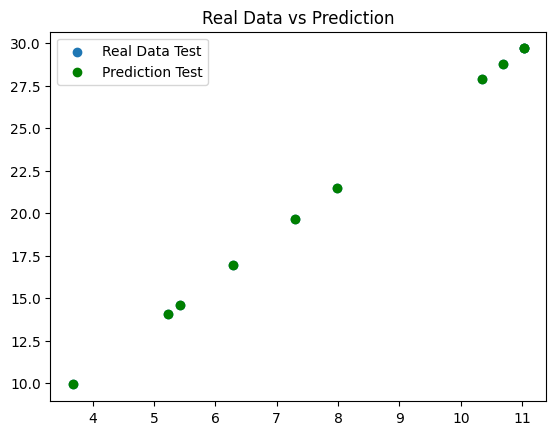

In [ ]:
# Judul plot
plt.title('Real Data vs Prediction')

# Scatter plot untuk data asli (Real Data Test)
plt.scatter(x3_test, y3_test, label="Real Data Test")

# Scatter plot untuk prediksi (Prediction Test) dengan warna merah
plt.scatter(x3_test, y3_predict, color='green', label='Prediction Test')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [ ]:
# Menampilkan lima baris pertama dari data pengujian
print(x3_test.head())

    freshwater_withdrawals
29               11.028632
15                7.304035
24               10.351433
17                7.981235
8                 5.225168


In [ ]:
# membuat dataframe
df3_forecasting = pd.DataFrame({
    'freshwater_withdrawals': [9.217488,9.747606,9.913105,10.078604,10.244103,10.409602,10.575101,10.740600,10.906099,11.071598,11.237097]
})
df3_forecasting.head()

# Melakukan prediksi pada kolom 'year' menggunakan model yang sudah dilatih
prediction_water_stress = rmodel.predict(df3_forecasting[['freshwater_withdrawals']])

# menambahkan hasil forecasting ke dalam dataframe df_forecasting
df3_forecasting['water_stress'] = prediction_water_stress
df3_forecasting

,freshwater_withdrawals,water_stress
0,9.217488,24.819723
1,9.747606,26.247158
2,9.913105,26.692793
3,10.078604,27.138428
4,10.244103,27.584063
5,10.409602,28.029698
6,10.575101,28.475333
7,10.740600,28.920967
8,10.906099,29.366602
9,11.071598,29.812237


In [ ]:
df3_forecasting.to_csv('water_stress.csv',index=False)

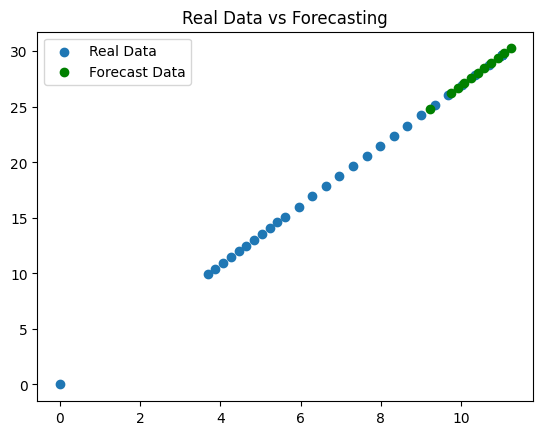

In [ ]:
# Judul plot
plt.title('Real Data vs Forecasting')

# Scatter plot untuk data asli (Real Data)
plt.scatter(x3, y3, label="Real Data")

# Scatter plot untuk hasil forecasting (Forecast Data) dengan warna merah
plt.scatter(df3_forecasting['freshwater_withdrawals'], df3_forecasting['water_stress'], color='green', label="Forecast Data")

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

Plot 'Real Data vs Forecasting' memvisualisasikan perbandingan antara data aktual pengambilan air tawar (freshwater_withdrawals) dan hasil prediksi (tingkat stres air) dari forecasting. Dari visualisasi ini, terlihat bahwa hasil prediksi (titik-titik berwarna hijau) cenderung mengikuti pola atau tren data aktual (titik-titik berwarna biru). Kesesuaian yang terlihat antara kedua kelompok titik menunjukkan bahwa model peramalan mungkin memiliki tingkat ketepatan yang baik dalam memprediksi tingkat stres air berdasarkan fluktuasi pengambilan air tawar.

Pemetaan ini juga membantu dalam mengidentifikasi pola hubungan antara kedua variabel. Jika terdapat pola atau tren yang jelas, ini memberikan wawasan tentang bagaimana pengambilan air tawar berkontribusi pada tingkat stres air.

Dengan demikian, plot ini memberikan pemahaman yang lebih dalam mengenai korelasi antara pengambilan air tawar dan tingkat stres air, serta kemampuan model dalam memprediksi tingkat stres air di masa depan berdasarkan variabilitas pengambilan air tawar yang diamati.

## Evaluate Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluasi model pertama (regresi linear untuk 'forest_area_percent')
mae1 = mean_absolute_error(Y_test, Y_predict)
mse1 = mean_squared_error(Y_test, Y_predict)
r_squared1 = r2_score(Y_test, Y_predict)

print("Evaluasi Model Pertama:")
print("MAE:", mae1)
print("MSE:", mse1)
print("R-squared:", r_squared1)

Evaluasi Model Pertama:
MAE: 1.3414785344615894
MSE: 2.53403867965667
R-squared: 0.8845674655667896


In [ ]:
# Evaluasi model kedua (regresi linear untuk 'freshwater_withdrawals')
mae2 = mean_absolute_error(y_test, y_predict)
mse2 = mean_squared_error(y_test, y_predict)
r_squared2 = r2_score(y_test, y_predict)

print("\nEvaluasi Model Kedua:")
print("MAE:", mae2)
print("MSE:", mse2)
print("R-squared:", r_squared2)


Evaluasi Model Kedua:
MAE: 1.2186739298949862
MSE: 2.110905454023576
R-squared: 0.686981877877294


In [ ]:
# Evaluasi model ketiga (regresi linear untuk 'water_stress')
mae3 = mean_absolute_error(y3_test, y3_predict)
mse3 = mean_squared_error(y3_test, y3_predict)
r_squared3 = r2_score(y3_test, y3_predict)

print("\nEvaluasi Model Ketiga:")
print("MAE:", mae3)
print("MSE:", mse3)
print("R-squared:", r_squared3)


Evaluasi Model Ketiga:
MAE: 2.4794543224260225e-05
MSE: 2.027939005379135e-09
R-squared: 0.9999999999585246


## Multivariate Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
urlX = ('https://raw.githubusercontent.com/doggykesetrum/Predict-Ability-of-Water-Resource/main/Final%20Project/Ketersediaan%20air%20per%20kapita%20(Cubic)%2C%20(2).csv')
urlY = ('https://raw.githubusercontent.com/doggykesetrum/Predict-Ability-of-Water-Resource/main/Final%20Project/KKKKKKKK%20-%20Ketersediaan%20air%20per%20kapita%20(Cubic).%20(1).csv')

In [ ]:
data = pd.read_csv (urlX)
data.head(5)

,tahun,pengambilan_air_tawar,luas_hutan,water_stress,ketersediaan_air_per_kapita_(kubik)
0,1990,3.681889,65.437714,9.914139,11082.02
1,1991,3.874804,64.484674,10.433596,10890.63
2,1992,4.067719,63.531633,10.953053,10705.97
3,1993,4.260634,62.578592,11.472510,10528.47
4,1994,4.453529,61.625551,11.991967,10356.10


In [ ]:
future_data = pd.read_csv (urlY)
future_data.head(5)

,Tahun,Pengambilan Air Tawar,Luas Hutan,Water Stress,Ketersediaan Air Per Kapita (cubic)
0,1990,3.681889,65.437714,9.914139,11082.02
1,1991,3.874804,64.484674,10.433596,10890.63
2,1992,4.067719,63.531633,10.953053,10705.97
3,1993,4.260634,62.578592,11.472510,10528.47
4,1994,4.453529,61.625551,11.991967,10356.10


In [ ]:
# Preparing the data for the model
X = data[['pengambilan_air_tawar', 'luas_hutan', 'water_stress']]
y = data['ketersediaan_air_per_kapita_(kubik)']

In [ ]:
# Splitting the data into training and testing sets and training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Filtering out the rows from the future data that are beyond the range of the original dataset
future_years_data = future_data[~future_data['Tahun'].isin(data['tahun'])]

In [ ]:
# Renaming columns in the future data to match the training data column names
future_years_data_renamed = future_years_data.rename(columns={
    'Pengambilan Air Tawar': 'pengambilan_air_tawar',
    'Luas Hutan': 'luas_hutan',
    'Water Stress': 'water_stress'
})

In [ ]:
# Preparing the data for prediction with correct column names
X_future_corrected = future_years_data_renamed[['pengambilan_air_tawar', 'luas_hutan', 'water_stress']]

In [ ]:
# Predicting water availability for the future years with corrected data
predicted_water_availability_corrected = model.predict(X_future_corrected)

In [ ]:
# Adding the predictions to the future data dataframe in a proper way to avoid the warning
future_years_data_renamed['Predicted Water Availability'] = predicted_water_availability_corrected

In [ ]:
# Displaying the future predictions with corrected column names and no warnings
future_years_data_renamed[['Tahun', 'pengambilan_air_tawar', 'luas_hutan', 'water_stress', 'Predicted Water Availability']]

,Tahun,pengambilan_air_tawar,luas_hutan,water_stress,Predicted Water Availability
31,2021,9.217488,48.361945,24.819723,7836.754161
32,2022,9.747606,46.788562,26.247158,7542.507084
33,2023,9.913105,46.297364,26.692793,7450.488865
34,2024,10.078604,45.806166,27.138428,7358.470647
35,2025,10.244103,45.314968,27.584063,7266.452428
36,2026,10.409602,44.823770,28.029698,7174.434210
37,2027,10.575101,44.332572,28.475333,7082.415991
38,2028,10.740600,43.841374,28.920967,6991.585184
39,2029,10.906099,43.350176,29.366602,6899.566965
40,2030,11.071598,42.858979,29.812237,6807.548848


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menghitung R-squared (R^2)
r_squared = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r_squared)

Mean Absolute Error (MAE): 35.29992548206025
Mean Squared Error (MSE): 2156.1127420816138
R-squared (R^2): 0.9968340256702942


# Unsupervised Learning

## Elbow Method

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Extracting the relevant features for clustering
features = df2.iloc[:, 1:3]

In [ ]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

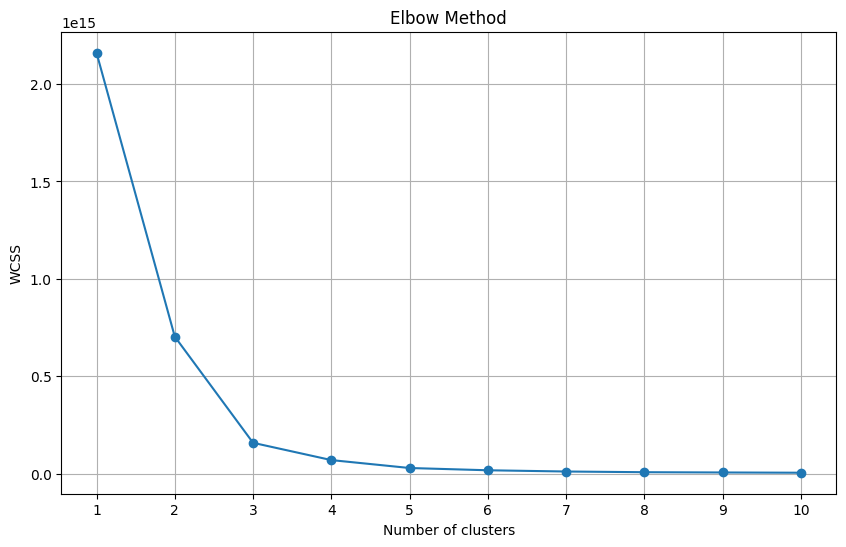

In [ ]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## K-Means Clustering

In [ ]:
# Applying K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Adding the cluster information to the original dataframe
df2['Cluster'] = clusters

In [ ]:
# Displaying a few rows of the updated dataframe
df2.head()

,Provinsi,Jumlah Luas Daratan Kawasan Hutan (Ha),Jumlah Luas Daratan dan Perairan Kawasan Hutan (Ha),Cluster
0,Aceh,3550390.23,3550390.23,3
1,Sumatera Utara,3055795.00,3055795.00,3
2,Sumatera Barat,2342894.00,2380057.00,3
3,Riau,5406992.00,5406992.00,3
4,Jambi,2098535.00,2098535.00,0


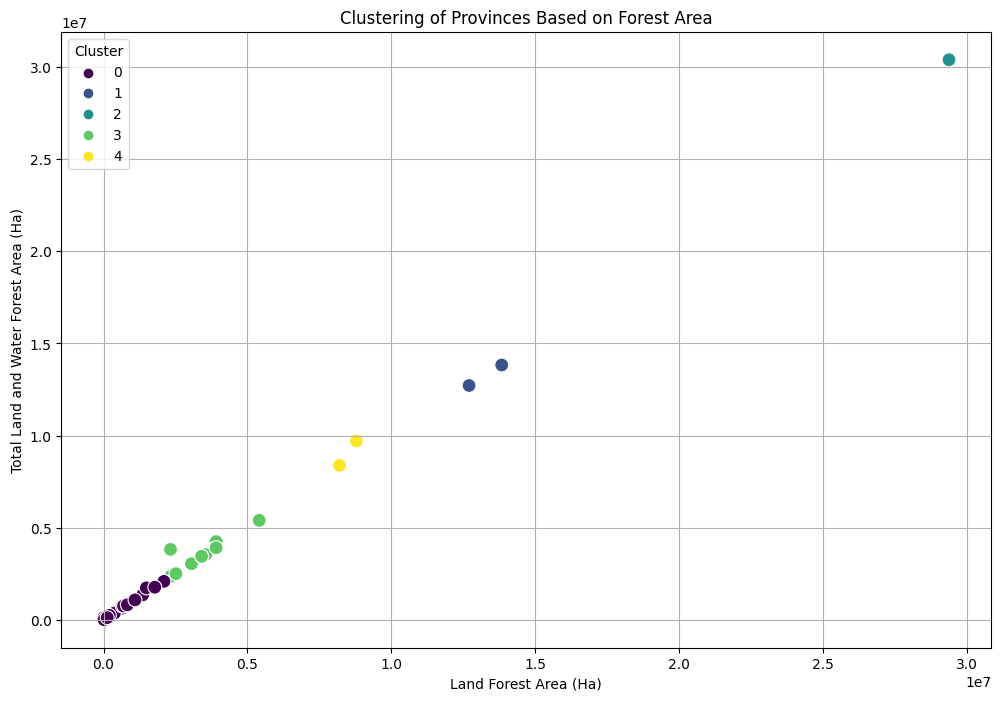

In [ ]:
# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df2, x="Jumlah Luas Daratan Kawasan Hutan (Ha)", y="Jumlah Luas Daratan dan Perairan Kawasan Hutan (Ha)", hue="Cluster", palette="viridis", s=100)
plt.title("Clustering of Provinces Based on Forest Area")
plt.xlabel("Land Forest Area (Ha)")
plt.ylabel("Total Land and Water Forest Area (Ha)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [ ]:
# Save the dataframe to a csv file
df2.to_csv('clustering_results.csv', index=False)

# Kesimpulan